### Import Necessary Packages

In [2]:
# Data Manipulation and Analysis
import pandas as pd
import numpy as np

In [4]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#machine learning model
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [4]:
#model eveluation
from sklearn.metrics import roc_curve, precision_recall_curve 
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score

In [5]:
import lightgbm as lgb  
import catboost as cb

In [6]:
print(f"Pandas version: {pd.__version__}")
print(f"Scikit-learn version: {sklearn.__version__}")
print(f"Numpy version: {np.__version__}")


Pandas version: 2.2.2
Scikit-learn version: 1.5.1
Numpy version: 1.26.4


In [7]:
pwd

'/Users/sadmansakib/Downloads/AdvanceML/adv_mla_at2_exp/notebooks/predictive'

### Loading and Exploring Datasets 

In [8]:
df_train = pd.read_csv('../../data/raw/sales_train.csv')
df_test = pd.read_csv('../../data/raw/sales_test.csv')
df_item = pd.read_csv('../../data/raw/items_weekly_sell_prices.csv')
df_calendar_events = pd.read_csv('../../data/raw/calendar_events.csv')
df_calendar = pd.read_csv('../../data/raw/calendar.csv')

In [9]:
df_train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1532,d_1533,d_1534,d_1535,d_1536,d_1537,d_1538,d_1539,d_1540,d_1541
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,1,0,1,0,1,0,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,8,2,0,8,2,3,1,1,3,8
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,0,1,3,2,1,1,2,2,3


In [10]:
df_test.head()

,d_1542,d_1543,d_1544,d_1545,d_1546,d_1547,d_1548,d_1549,d_1550,d_1551,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,0,1,0,2,1,0,2,0,1,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,1,2,1,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,4,1,0,1,3,5,2,3,0,2,...,1,1,0,4,0,1,3,0,2,6
4,3,0,0,1,1,0,2,0,2,1,...,0,0,0,2,1,0,0,2,1,0


In [11]:
df_item.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [12]:
df_item.shape

(6841121, 4)

In [13]:
df_calendar.head()

,date,wm_yr_wk,d
0,2011-01-29,11101,d_1
1,2011-01-30,11101,d_2
2,2011-01-31,11101,d_3
3,2011-02-01,11101,d_4
4,2011-02-02,11101,d_5


In [14]:
df_calendar_events.head()

,date,event_name,event_type
0,2011-02-06,SuperBowl,Sporting
1,2011-02-14,ValentinesDay,Cultural
2,2011-02-21,PresidentsDay,National
3,2011-03-09,LentStart,Religious
4,2011-03-16,LentWeek2,Religious


In [15]:
null_counts = df_calendar_events.isnull().sum()
print(null_counts)

date          0
event_name    0
event_type    0
dtype: int64


In [16]:
null_counts = df_item.isnull().sum()
print(null_counts)

store_id      0
item_id       0
wm_yr_wk      0
sell_price    0
dtype: int64


In [17]:
min_price = df_item['sell_price'].min()
max_price = df_item['sell_price'].max()

print(f"The range of sell_price is from {min_price} to {max_price}")

The range of sell_price is from 0.01 to 107.32


In [18]:
price_stats = df_item['sell_price'].describe()
print(price_stats)

count    6.841121e+06
mean     4.410952e+00
std      3.408814e+00
min      1.000000e-02
25%      2.180000e+00
50%      3.470000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


In [19]:
# Melt training dataset  to long format
df_train_long = df_train.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

# Display the first few rows
print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales  
0       CA  d_1      0  
1       CA  d_1      0  
2       CA  d_1      0  
3       CA  d_1      0  
4       CA  d_1      0  


In [20]:
df_train_long.shape

(46985090, 8)

In [21]:
null_counts = df_train_long.isnull().sum()
print(null_counts)

id          0
item_id     0
dept_id     0
cat_id      0
store_id    0
state_id    0
d           0
sales       0
dtype: int64


In [22]:
unique_sales_count = df_train_long['sales'].nunique()
print(f"Number of unique values in 'sales' column: {unique_sales_count}")

# to see the unique values
unique_sales_values = df_train_long['sales'].unique()
print("Unique values in 'sales' column:")
print(unique_sales_values)

Number of unique values in 'sales' column: 419
Unique values in 'sales' column:
[  0  12   2   4   5   9   3   1  25  45  10   8   7  16  54   6  50  14
  11  17  15  23  13  20  19  38  32  21  30  33 107  51  26 147  22  43
  24  35  27  42  49  36  18  37 116  56  28  34  41  31  39  44 108  55
 360  62  69  75 125  53  47  29 164  52 102  63  98  59 203 152  65 115
  46  57  90  58  78  64 130  60 208  93  61  40  73 182 198 121 132 436
 123 215 160  85 112 141  79  48 153 204  70  67  92  86 207  74  94  66
  91 128  84  71  83  72 119  76  99 134  80  89 106 120 323 127 139 109
 140 114 296 314 159  96  82  81 180 137 171 100 279 316 150  97 169  68
  87 174 188 195 124 202 175 370 118 200 136 187 250 104 367 178  95  88
 214 186 385 105  77 177 184 162 103 228 331 353 101 154 126 258 117 151
 163 133 149 110 135 122 111 113 158 138 294 129 146 131 142 166 148 144
 145 634 167 172 191 143 161 192 193 179 262 189 168 420 155 280 273 254
 240 156 336 478 210 359 234 170 249 227 460

In [23]:
# Merge training dataset with calendar datset
df_train_long = df_train_long.merge(df_calendar, on='d', how='left')

print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  
0       CA  d_1      0  2011-01-29     11101  
1       CA  d_1      0  2011-01-29     11101  
2       CA  d_1      0  2011-01-29     11101  
3       CA  d_1      0  2011-01-29     11101  
4       CA  d_1      0  2011-01-29     11101  


In [24]:
min_price = df_train_long['sales'].min()
max_price = df_train_long['sales'].max()

print(f"The range of sell_price is from {min_price} to {max_price}")

The range of sell_price is from 0 to 763


In [25]:
# Merge training dataset with item datset
df_train_long = df_train_long.merge(
    df_item,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)


print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  sell_price  
0       CA  d_1      0  2011-01-29     11101         NaN  
1       CA  d_1      0  2011-01-29     11101         NaN  
2       CA  d_1      0  2011-01-29     11101         NaN  
3       CA  d_1      0  2011-01-29     11101         NaN  
4       CA  d_1      0  2011-01-29     11101         NaN  


In [26]:
# Check for missing sell_price values
missing_sell_price = df_train_long['sell_price'].isnull().sum()
total_rows = len(df_train_long)
print(f"Missing 'sell_price': {missing_sell_price} out of {total_rows} rows")

Missing 'sell_price': 12264399 out of 46985090 rows


**After merging the training dataset, approximately 26.10% of the values in the ‘sell_price’ column are missing.**

In [27]:
df_train_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,NaN


In [28]:
# Range in df_train_long
wm_yr_wk_train_min = df_train_long['wm_yr_wk'].min()
wm_yr_wk_train_max = df_train_long['wm_yr_wk'].max()
print(f"df_train_long wm_yr_wk range: {wm_yr_wk_train_min} - {wm_yr_wk_train_max}")

# Range in df_item
wm_yr_wk_item_min = df_item['wm_yr_wk'].min()
wm_yr_wk_item_max = df_item['wm_yr_wk'].max()
print(f"df_item wm_yr_wk range: {wm_yr_wk_item_min} - {wm_yr_wk_item_max}")

df_train_long wm_yr_wk range: 11101 - 11512
df_item wm_yr_wk range: 11101 - 11621


In [29]:
count = (df_item['wm_yr_wk'] == 11512).sum()

print(f"Number of times 11512 appears in df_item['wm_yr_wk']: {count}")

Number of times 11512 appears in df_item['wm_yr_wk']: 30063


In [30]:
count = (df_train_long['wm_yr_wk'] == 11512).sum()

print(f"Number of times 11512 appears in df_train_long['wm_yr_wk']: {count}")

Number of times 11512 appears in df_train_long['wm_yr_wk']: 30490


In [31]:
is_present = 11512 in df_item['wm_yr_wk'].values

print(f"Is 11512 present in df_item['wm_yr_wk']: {is_present}")

Is 11512 present in df_item['wm_yr_wk']: True


In [32]:
# Weeks in df_train_long not in df_item
wm_yr_wk_diff = set(df_train_long['wm_yr_wk']) - set(df_item['wm_yr_wk'])
print(f"Number of wm_yr_wk in df_train_long not in df_item: {len(wm_yr_wk_diff)}")

Number of wm_yr_wk in df_train_long not in df_item: 0


In [33]:
# List of sample missing combinations
missing_keys_sample = [
    {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_313', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_318', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_2_253', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_3_006', 'wm_yr_wk': 11512},
    {'store_id': 'WI_3', 'item_id': 'FOODS_3_777', 'wm_yr_wk': 11512},
]

# Check if these combinations exist in df_item
for key in missing_keys_sample:
    exists = df_item[
        (df_item['store_id'] == key['store_id']) &
        (df_item['item_id'] == key['item_id']) &
        (df_item['wm_yr_wk'] == key['wm_yr_wk'])
    ]
    if exists.empty:
        print(f"Combination not found in df_item: {key}")
    else:
        print(f"Combination found in df_item: {key}")

Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_313', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'HOUSEHOLD_2_318', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_2_253', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_3_006', 'wm_yr_wk': 11512}
Combination not found in df_item: {'store_id': 'WI_3', 'item_id': 'FOODS_3_777', 'wm_yr_wk': 11512}


**Observation** The wm_yr_wk value 11512 exists in df_item, but not for these specific combinations.

**Incomplete Price Data** df_item may not have price data for all items in all stores for every week.

**Items are not sold in certain stores** Some items might not be sold in certain stores during specific weeks.

**Data Collection Gaps** Data gaps may exist due to issues with collection or recording.

count    3.472069e+07
mean     4.383804e+00
std      3.358138e+00
min      1.000000e-02
25%      2.080000e+00
50%      3.440000e+00
75%      5.840000e+00
max      1.073200e+02
Name: sell_price, dtype: float64


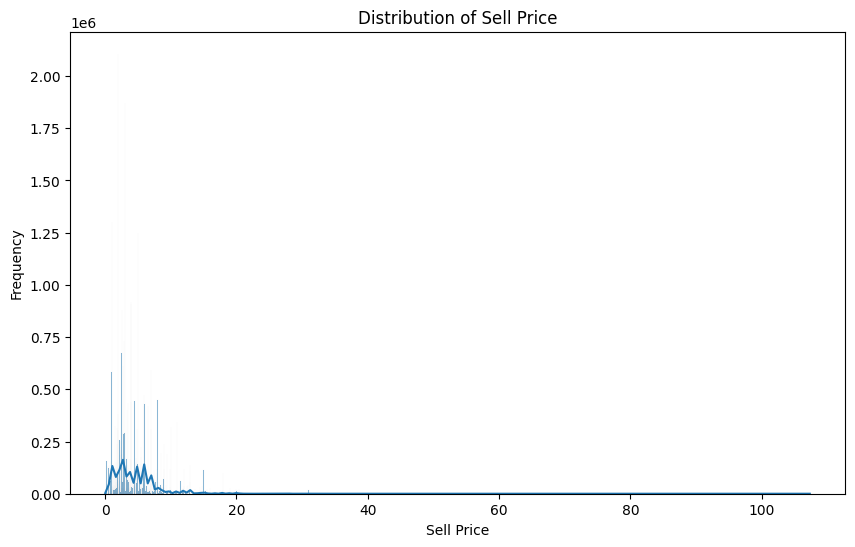

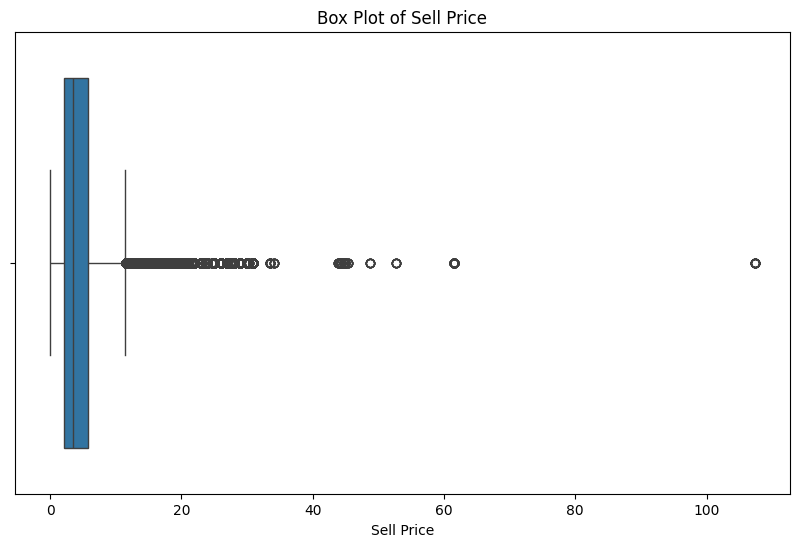


Top 10 most frequent sell prices:
sell_price
1.98    1307605
2.98    1255761
3.98     917414
2.50     880860
3.97     873746
1.00     838209
4.97     814334
1.97     795714
2.48     673167
2.97     614473
Name: count, dtype: int64


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print(df_train_long['sell_price'].describe())

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_train_long['sell_price'], kde=True)
plt.title('Distribution of Sell Price')
plt.xlabel('Sell Price')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_train_long['sell_price'])
plt.title('Box Plot of Sell Price')
plt.xlabel('Sell Price')
plt.show()

# Display top 10 most frequent values
print("\nTop 10 most frequent sell prices:")
print(df_train_long['sell_price'].value_counts().nlargest(10))

**Based on the visualization, we can see that the majority of item sell prices are below $20. Most items are priced between 1 to 5 dollar.There are some items with prices above 40 dollars which are likely niche products.**

In [35]:
# Calculate the average sell_price for each item_id across all stores and weeks
item_avg_price = df_item.groupby('item_id')['sell_price'].mean()
# Fill remaining missing sell_price with item average price
df_train_long['sell_price'] = df_train_long.apply(
    lambda row: item_avg_price[row['item_id']] if pd.isnull(row['sell_price']) else row['sell_price'],
    axis=1
)
# Check remaining missing values
missing_sell_price = df_train_long['sell_price'].isnull().sum()
print(f"Missing 'sell_price' after filling with item average price: {missing_sell_price}")

Missing 'sell_price' after filling with item average price: 0


In [36]:
# Calculate sales revenue
df_train_long['revenue'] = df_train_long['sales'] * df_train_long['sell_price']


print(df_train_long[['sales', 'sell_price', 'revenue']].head())

   sales  sell_price  revenue
0      0    8.298076      0.0
1      0    3.967459      0.0
2      0    2.965733      0.0
3      0    4.502845      0.0
4      0    2.880902      0.0


In [37]:
# Merge df_train_long with df_calendar_events
df_train_long = df_train_long.merge(
    df_calendar_events,
    on='date',
    how='left'
)


print(df_train_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id    d  sales        date  wm_yr_wk  sell_price  revenue event_name  \
0       CA  d_1      0  2011-01-29     11101    8.298076      0.0        NaN   
1       CA  d_1      0  2011-01-29     11101    3.967459      0.0        NaN   
2       CA  d_1      0  2011-01-29     11101    2.965733      0.0        NaN   
3       CA  d_1      0  2011-01-29     11101    4.502845      0.0        NaN   
4       CA  d_1      0  2011-01-29     11101    2.880902      0.0        NaN   

  event_type  
0        NaN  
1       

In [38]:
null_counts = df_train_long.isnull().sum()
print(null_counts)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
sell_price           0
revenue              0
event_name    43143350
event_type    43143350
dtype: int64


**After merging the training dataset with the calendar dataset, we can see that over 90% of the values in the event name and event type columns are missing**

In [39]:
# checking  testing  and training datasets have the same number of rows.
assert len(df_test) == len(df_train)

# Copy identifier columns from df_train to df_test
for col in ['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id']:
    df_test[col] = df_train[col]

# Reorder columns to have identifiers first
df_test = df_test[['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'] + [col for col in df_test.columns if col.startswith('d_')]]

print(df_test.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id  d_1542  d_1543  d_1544  d_1545  ...  d_1932  d_1933  d_1934  \
0       CA       0       1       0       2  ...       2       4       0   
1       CA       0       0       0       0  ...       0       1       2   
2       CA       0       0       0       0  ...       1       0       2   
3       CA       4       1       0       1  ...       1       1       0   
4       CA       3       0       0       1  ...       0       0       0   

   d_1935  d_1936  d_1937  d_1938  d_1939  d_1940  d_1941  
0       

In [40]:
# Melt df_test to long format
df_test_long = df_test.melt(
    id_vars=['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'],
    var_name='d',
    value_name='sales'
)

# Display the first few rows
print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales  
0       CA  d_1542      0  
1       CA  d_1542      0  
2       CA  d_1542      0  
3       CA  d_1542      4  
4       CA  d_1542      3  


In [41]:
# Merge df_test_long with df_calendar
df_test_long = df_test_long.merge(df_calendar, on='d', how='left')

# Merge df_test_long with df_item
df_test_long = df_test_long.merge(
    df_item,
    on=['store_id', 'item_id', 'wm_yr_wk'],
    how='left'
)

# Display the first few rows
print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  
0       CA  d_1542      0  2015-04-19     11512        8.26  
1       CA  d_1542      0  2015-04-19     11512        3.97  
2       CA  d_1542      0  2015-04-19     11512        2.97  
3       CA  d_1542      4  2015-04-19     11512        4.64  
4       CA  d_1542      3  2015-04-19     11512        2.88  


In [42]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id                0
item_id           0
dept_id           0
cat_id            0
store_id          0
state_id          0
d                 0
sales             0
date              0
wm_yr_wk          0
sell_price    35014
dtype: int64


In [43]:
# Calculate the average sell_price for each item_id across all stores and weeks
item_avg_price = df_item.groupby('item_id')['sell_price'].mean()
# Fill remaining missing sell_price with item average price
df_test_long['sell_price'] = df_test_long.apply(
    lambda row: item_avg_price[row['item_id']] if pd.isnull(row['sell_price']) else row['sell_price'],
    axis=1
)
# Check remaining missing values
missing_sell_price = df_test_long['sell_price'].isnull().sum()
print(f"Missing 'sell_price' after filling with item average price: {missing_sell_price}")

Missing 'sell_price' after filling with item average price: 0


In [44]:
# Calculate revenue
df_test_long['revenue'] = df_test_long['sales'] * df_test_long['sell_price']


print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  revenue  
0       CA  d_1542      0  2015-04-19     11512        8.26     0.00  
1       CA  d_1542      0  2015-04-19     11512        3.97     0.00  
2       CA  d_1542      0  2015-04-19     11512        2.97     0.00  
3       CA  d_1542      4  2015-04-19     11512        4.64    18.56  
4       CA  d_1542      3  2015-04-19     11512        2.88     8.64  


In [45]:
# Merge with df_calendar_events
df_test_long = df_test_long.merge(df_calendar_events, on='date', how='left')


print(df_test_long.head())

                              id        item_id    dept_id   cat_id store_id  \
0  HOBBIES_1_001_CA_1_evaluation  HOBBIES_1_001  HOBBIES_1  HOBBIES     CA_1   
1  HOBBIES_1_002_CA_1_evaluation  HOBBIES_1_002  HOBBIES_1  HOBBIES     CA_1   
2  HOBBIES_1_003_CA_1_evaluation  HOBBIES_1_003  HOBBIES_1  HOBBIES     CA_1   
3  HOBBIES_1_004_CA_1_evaluation  HOBBIES_1_004  HOBBIES_1  HOBBIES     CA_1   
4  HOBBIES_1_005_CA_1_evaluation  HOBBIES_1_005  HOBBIES_1  HOBBIES     CA_1   

  state_id       d  sales        date  wm_yr_wk  sell_price  revenue  \
0       CA  d_1542      0  2015-04-19     11512        8.26     0.00   
1       CA  d_1542      0  2015-04-19     11512        3.97     0.00   
2       CA  d_1542      0  2015-04-19     11512        2.97     0.00   
3       CA  d_1542      4  2015-04-19     11512        4.64    18.56   
4       CA  d_1542      3  2015-04-19     11512        2.88     8.64   

  event_name event_type  
0        NaN        NaN  
1        NaN        NaN  
2       

In [46]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id                   0
item_id              0
dept_id              0
cat_id               0
store_id             0
state_id             0
d                    0
sales                0
date                 0
wm_yr_wk             0
sell_price           0
revenue              0
event_name    11220320
event_type    11220320
dtype: int64


In [47]:
df_test_long.shape

(12196000, 14)

In [48]:
# Fill NaN values with 'NoEvent'
df_train_long = df_train_long.copy() 
df_train_long['event_name'] = df_train_long['event_name'].fillna('NoEvent')
df_train_long['event_type'] = df_train_long['event_type'].fillna('NoEvent')

In [49]:
# Fill NaN values with 'NoEvent'
df_test_long = df_test_long.copy() 
df_test_long['event_name'] = df_test_long['event_name'].fillna('NoEvent')
df_test_long['event_type'] = df_test_long['event_type'].fillna('NoEvent')


In [50]:
null_counts = df_test_long.isnull().sum()
print(null_counts)

id            0
item_id       0
dept_id       0
cat_id        0
store_id      0
state_id      0
d             0
sales         0
date          0
wm_yr_wk      0
sell_price    0
revenue       0
event_name    0
event_type    0
dtype: int64


In [10]:
df_train_long = pd.read_csv('../../data/processed/df_train_long.csv')
df_test_long = pd.read_csv('../../data/processed/df_test_long.csv')

## Feature Engineering

In [196]:
df_train_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,8.298076,0.0,NoEvent,NoEvent
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,3.967459,0.0,NoEvent,NoEvent
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.965733,0.0,NoEvent,NoEvent
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,4.502845,0.0,NoEvent,NoEvent
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,2.880902,0.0,NoEvent,NoEvent


In [197]:
def count_unique_identities(df):
    # Filter the DataFrame to only include object-type columns
    object_columns = df.select_dtypes(include=['object']).columns
    
    # Create a dictionary to store the column name and the number of unique values
    unique_counts = {col: df[col].nunique() for col in object_columns}
    
    # Return the dictionary with the counts
    return unique_counts

# Usage with df_train_long
unique_values = count_unique_identities(df_train_long)

# Display the unique counts for each object-type column
for column, count in unique_values.items():
    print(f"Column '{column}' has {count} unique values.")

Column 'id' has 30490 unique values.
Column 'item_id' has 3049 unique values.
Column 'dept_id' has 7 unique values.
Column 'cat_id' has 3 unique values.
Column 'store_id' has 10 unique values.
Column 'state_id' has 3 unique values.
Column 'd' has 1541 unique values.
Column 'date' has 1541 unique values.
Column 'event_name' has 31 unique values.
Column 'event_type' has 5 unique values.


#### Analyzing products department and category 

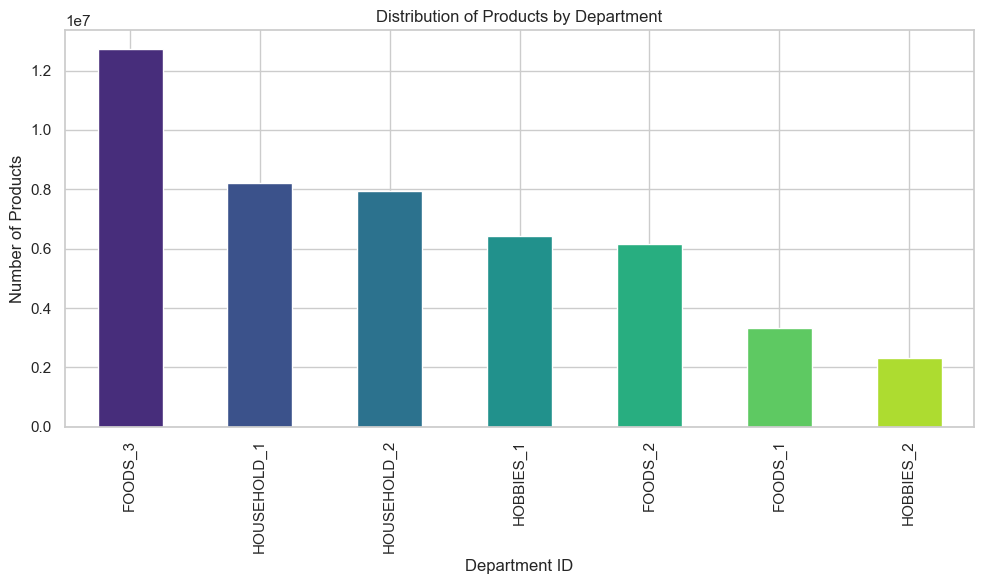

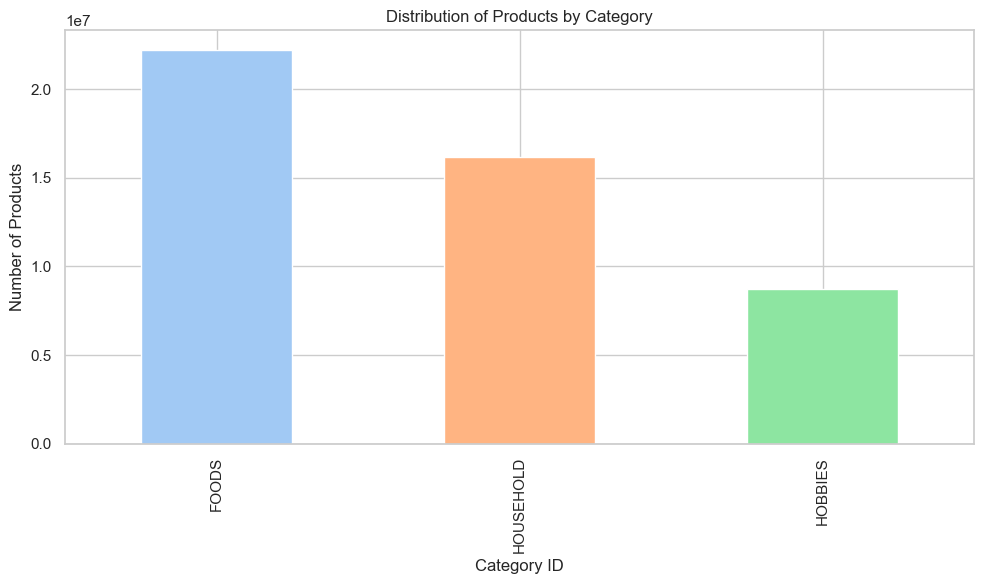

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution by dept_id
plt.figure(figsize=(10, 6))
palette_dept = sns.color_palette("viridis", n_colors=len(df_train_long['dept_id'].unique()))
dept_counts = df_train_long['dept_id'].value_counts()
dept_counts.plot(kind='bar', color=dept_counts.index.map(dict(zip(dept_counts.index, palette_dept))))
plt.title('Distribution of Products by Department')
plt.xlabel('Department ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# Distribution by cat_id
plt.figure(figsize=(10, 6))
palette_cat = sns.color_palette("pastel", n_colors=len(df_train_long['cat_id'].unique()))
cat_counts = df_train_long['cat_id'].value_counts()
cat_counts.plot(kind='bar', color=cat_counts.index.map(dict(zip(cat_counts.index, palette_cat)))) # using .map for colors
plt.title('Distribution of Products by Category')
plt.xlabel('Category ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Foods_3 offered the most items, followed by Household_1. From this visualization, we can see that stores primarily offer food and household items. Based on the department and category IDs, we can conclude that the stores focus on grocery and everyday household needs.**

#### Analyzing Products by Store and state 

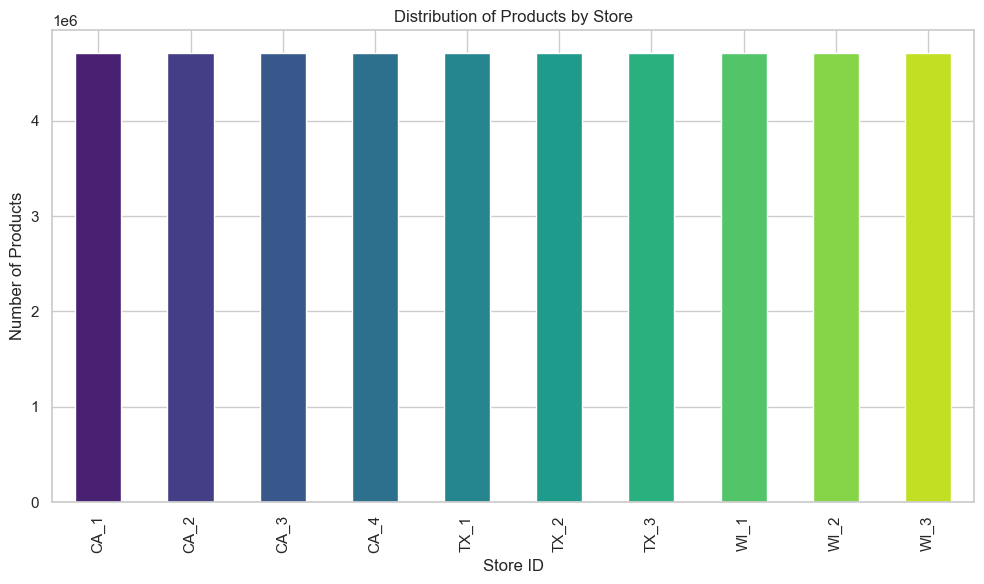

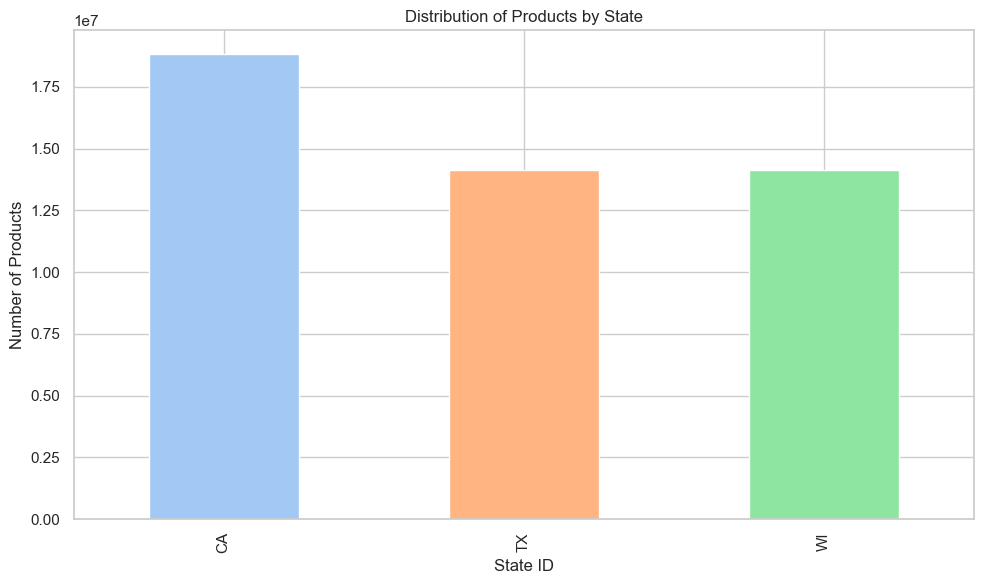

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution by store_id
plt.figure(figsize=(10, 6))
palette_store = sns.color_palette("viridis", n_colors=len(df_train_long['store_id'].unique()))
store_counts = df_train_long['store_id'].value_counts()
store_counts.plot(kind='bar', color=store_counts.index.map(dict(zip(store_counts.index, palette_store))))
plt.title('Distribution of Products by Store')
plt.xlabel('Store ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Distribution by state_id
plt.figure(figsize=(10, 6))
palette_state = sns.color_palette("pastel", n_colors=len(df_train_long['state_id'].unique()))
state_counts = df_train_long['state_id'].value_counts()
state_counts.plot(kind='bar', color=state_counts.index.map(dict(zip(state_counts.index, palette_state))))
plt.title('Distribution of Products by State')
plt.xlabel('State ID')
plt.ylabel('Number of Products')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [29]:
store_distribution = df_train_long['store_id'].value_counts().sort_index()

# Convert to a dictionary 
products_per_store = store_distribution.to_dict()

# Print the result
for store_id, product_count in products_per_store.items():
    print(f"Store ID {store_id}: {product_count} products")

Store ID CA_1: 4710705 products
Store ID CA_2: 4710705 products
Store ID CA_3: 4710705 products
Store ID CA_4: 4710705 products
Store ID TX_1: 4710705 products
Store ID TX_2: 4710705 products
Store ID TX_3: 4710705 products
Store ID WI_1: 4710705 products
Store ID WI_2: 4710705 products
Store ID WI_3: 4710705 products


In [31]:
# Count unique products per store
unique_products_per_store = df_train_long.groupby('store_id')['item_id'].nunique()

# Convert to a dictionary 
products_per_store = unique_products_per_store.to_dict()

# Print the result
for store_id, product_count in products_per_store.items():
    print(f"Store ID {store_id}: {product_count} unique products")

# Print insights
print(f"\nTotal unique products across all stores: {df_train_long['item_id'].nunique()}")
print(f"Total unique dates: {df_train_long['date'].nunique()}")
print(f"Average sales entries per store: {len(df_train_long) / len(unique_products_per_store)}")

Store ID CA_1: 3049 unique products
Store ID CA_2: 3049 unique products
Store ID CA_3: 3049 unique products
Store ID CA_4: 3049 unique products
Store ID TX_1: 3049 unique products
Store ID TX_2: 3049 unique products
Store ID TX_3: 3049 unique products
Store ID WI_1: 3049 unique products
Store ID WI_2: 3049 unique products
Store ID WI_3: 3049 unique products

Total unique products across all stores: 3049
Total unique dates: 1541
Average sales entries per store: 4710705.0


**The bar chart shows the uniform distribution of all products across all store IDs, with each store having the same 3049 unique products. This indicates that the company maintains consistent product offerings in all its stores. From the training dataset (2011 to 2015), we can see that there are a total of 1541 unique dates of data.**

#### Converting datetime in to week,month,year and is_weekend

In [15]:
# Convert 'date' to datetime
df_train_long['date'] = pd.to_datetime(df_train_long['date'])
df_test_long['date'] = pd.to_datetime(df_test_long['date'])

# Extract date features
for df in [df_train_long, df_test_long]:
    df['day_of_week'] = df['date'].dt.dayofweek
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

In [57]:
df_train_long.head().T

,0,1,2,3,4
id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES
store_id,CA_1,CA_1,CA_1,CA_1,CA_1
state_id,CA,CA,CA,CA,CA
d,d_1,d_1,d_1,d_1,d_1
sales,0,0,0,0,0
date,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00
wm_yr_wk,11101,11101,11101,11101,11101


In [59]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item_id      object        
 2   dept_id      object        
 3   cat_id       object        
 4   store_id     object        
 5   state_id     object        
 6   d            object        
 7   sales        int64         
 8   date         datetime64[ns]
 9   wm_yr_wk     int64         
 10  sell_price   float64       
 11  revenue      float64       
 12  event_name   object        
 13  event_type   object        
 14  day_of_week  int32         
 15  month        int32         
 16  year         int32         
 17  is_weekend   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(9)
memory usage: 5.8+ GB


In [60]:
#Sales by Department and Category
dept_cat_sales = df_train_long.groupby(['dept_id', 'cat_id'])['sales'].sum().reset_index()
print("Top Departments and Categories by Sales:")
print(dept_cat_sales.sort_values('sales', ascending=False).head(10))


Top Departments and Categories by Sales:
       dept_id     cat_id     sales
2      FOODS_3      FOODS  25877025
5  HOUSEHOLD_1  HOUSEHOLD   8636307
1      FOODS_2      FOODS   5749524
3    HOBBIES_1    HOBBIES   4306301
0      FOODS_1      FOODS   3963875
6  HOUSEHOLD_2  HOUSEHOLD   2290913
4    HOBBIES_2    HOBBIES    384218


**Based on the analysis above, we can say that these three superstores sold the most **FOOD** items, which is expected**

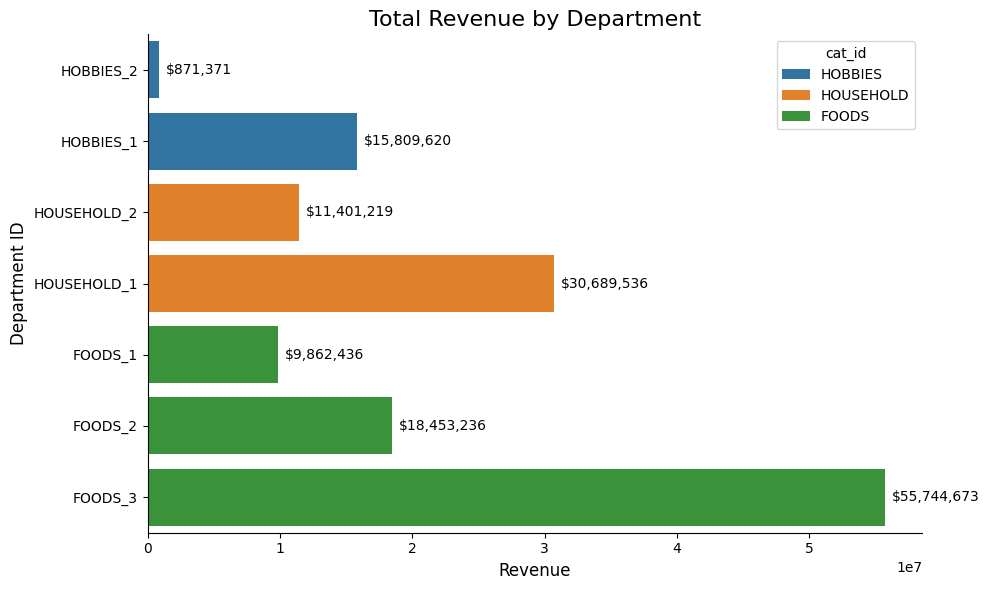

In [61]:
# Calculate total revenue per department
dept_revenue = df_train_long.groupby('dept_id')['revenue'].sum().reset_index()

# Merge with category mapping
category_mapping = df_train_long[['dept_id', 'cat_id']].drop_duplicates()
dept_revenue = pd.merge(dept_revenue, category_mapping, on='dept_id', how='left')

# Calculate total revenue per category for sorting
cat_revenue = dept_revenue.groupby('cat_id')['revenue'].sum().sort_values(ascending=True).index

# Sort departments within each category by revenue
dept_revenue['cat_id'] = pd.Categorical(dept_revenue['cat_id'], categories=cat_revenue, ordered=True)
dept_revenue = dept_revenue.sort_values(['cat_id', 'revenue'], ascending=[True, True])

# Create the plot using default color palette
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=dept_revenue, x='revenue', y='dept_id', 
    hue='cat_id', dodge=False, orient='h'  # Removed palette argument
)

# Add value labels
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', padding=5)

# Customize the plot
plt.title('Total Revenue by Department', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Department ID', fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

**FOODS_3 department offered the most items and also generated the most revenue. From this graph, we can conclude that the departments offering the most items also generated the most revenue.**

#### Top Selling Items

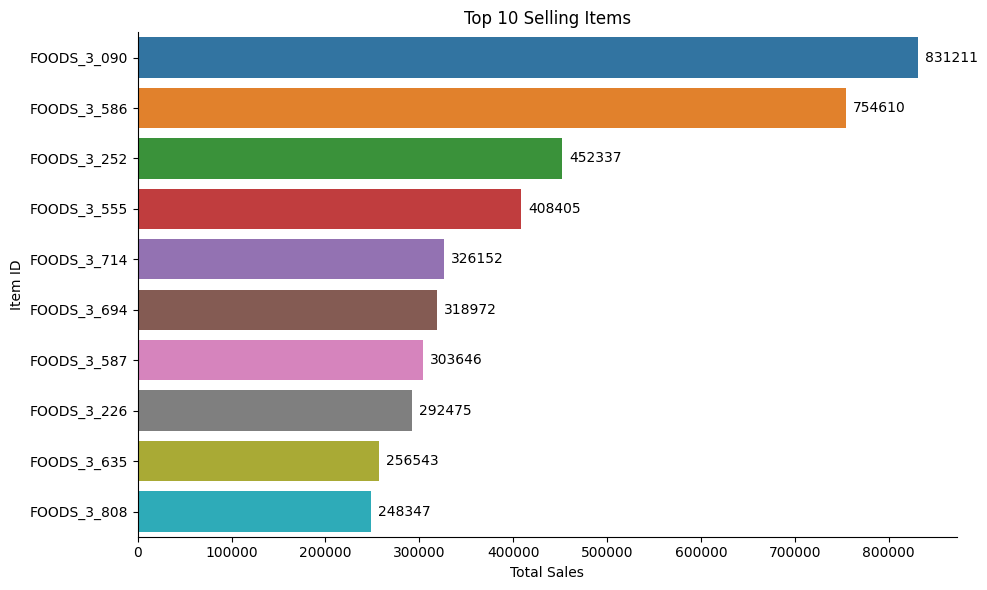

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total sales for each item
top_items = df_train_long.groupby('item_id')['sales'].sum().nlargest(10).reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='sales', y='item_id', data=top_items, hue='item_id', dodge=False)  

# Add labels and title
plt.xlabel("Total Sales")
plt.ylabel("Item ID")
plt.title("Top 10 Selling Items")

# Annotate bars with sales values
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}', (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='left', va='center', xytext=(5, 0), textcoords='offset points')


sns.despine()

# Show the plot
plt.tight_layout()
plt.show()

**Department FOODS_3, item number 90, has the highest sales, followed by item number 586. From this graph, we can conclude that items from the FOODS_3 department are the top-selling products.**

#### Sales by Store and State




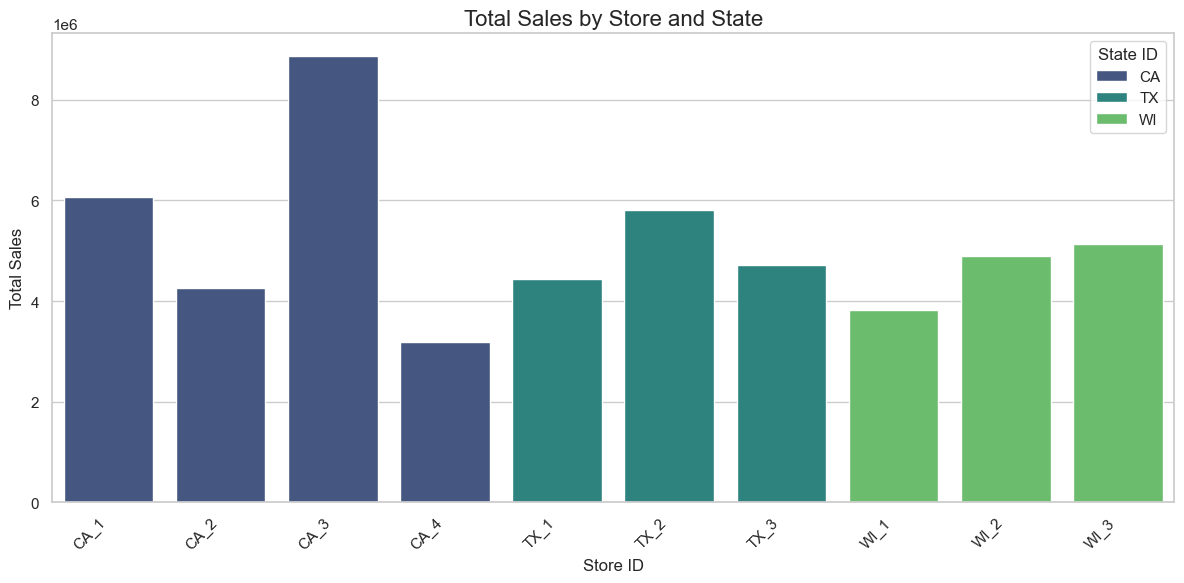


Summary Table (Sales by Store and State):
store_id     CA_1     CA_2     CA_3     CA_4     TX_1     TX_2     TX_3  \
state_id                                                                  
CA        6064780  4264406  8875615  3195086        0        0        0   
TX              0        0        0        0  4428852  5803783  4710203   
WI              0        0        0        0        0        0        0   

store_id     WI_1     WI_2     WI_3  
state_id                             
CA              0        0        0  
TX              0        0        0  
WI        3826487  4900595  5138356  


In [208]:
# Calculate total sales per store and state
store_state_sales = df_train_long.groupby(['store_id', 'state_id'])['sales'].sum().reset_index()

# Create the clustered bar chart
plt.figure(figsize=(12, 6))
sns.barplot(
    data=store_state_sales,
    x='store_id',
    y='sales',
    hue='state_id',
    palette='viridis'
)
plt.title('Total Sales by Store and State', fontsize=16)
plt.xlabel('Store ID', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='State ID')
plt.show()


# Create a summary table
sales_summary = store_state_sales.pivot_table(values='sales', index='state_id', columns='store_id', aggfunc='sum', fill_value=0)
print("\nSummary Table (Sales by Store and State):")
print(sales_summary)



**CA_3 has the highest sales, followed by TX_2 and WI_3. From the graph, we can conclude that the stores in California dominate compared to the other stores**

#### Based on the event average sales

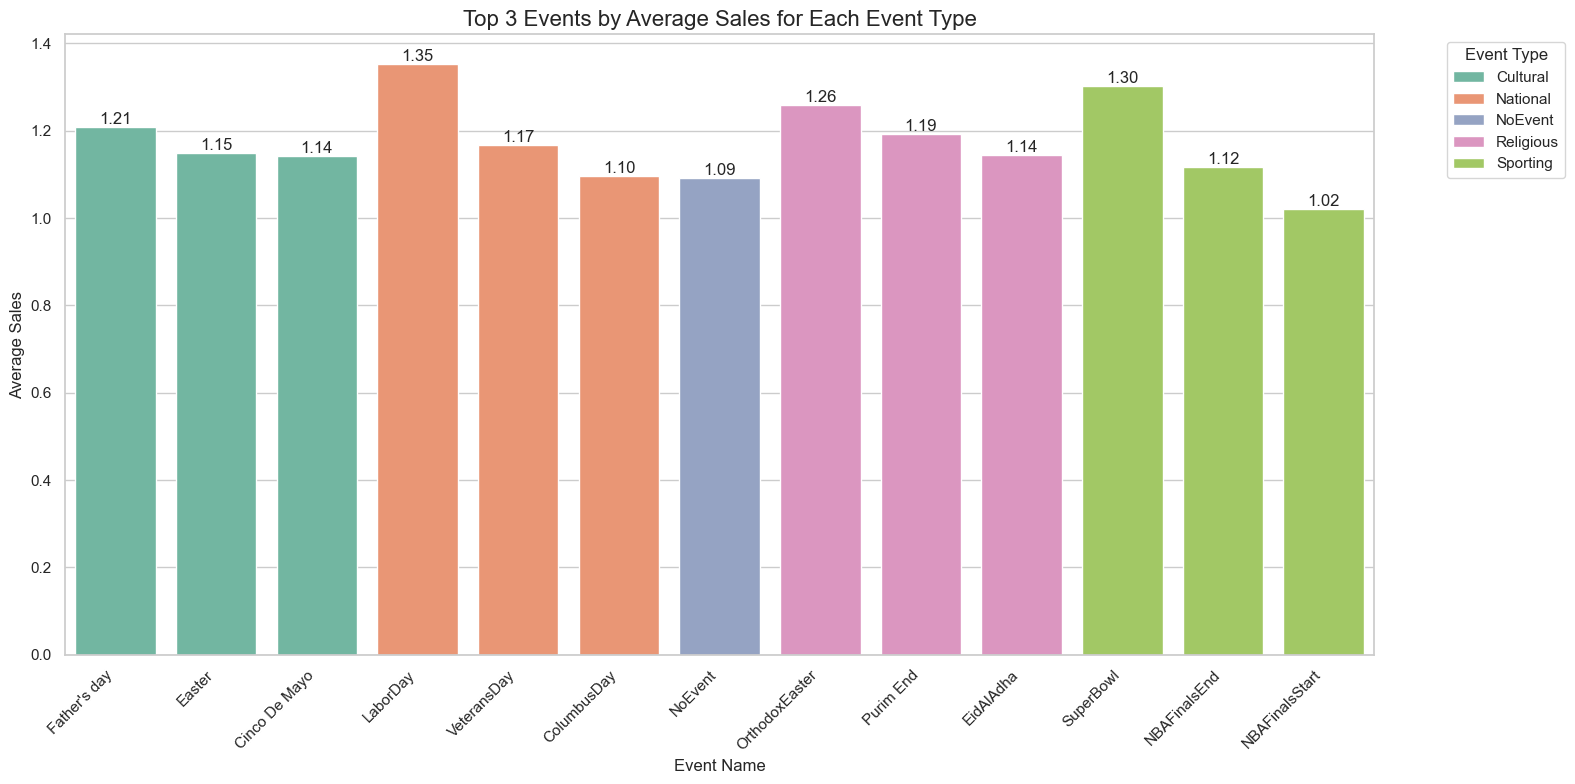

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate average sales per event name and type
event_sales = df_train_long.groupby(['event_name', 'event_type'])['sales'].mean().reset_index()

# Get top 3 events for each type
top_3_events = (event_sales.sort_values('sales', ascending=False)
                           .groupby('event_type')
                           .head(3)
                           .reset_index(drop=True))

# Sort for better visualization
top_3_events_sorted = top_3_events.sort_values(['event_type', 'sales'], ascending=[True, False])

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    data=top_3_events_sorted,
    x='event_name',
    y='sales',
    hue='event_type',
    dodge=False,
    palette='Set2'
)

plt.title('Top 3 Events by Average Sales for Each Event Type', fontsize=16)
plt.xlabel('Event Name', fontsize=12)
plt.ylabel('Average Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Event Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Annotate bars with sales values
for i, v in enumerate(top_3_events_sorted['sales']):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.show()

**LaborDay has the highest average sales, followed by Super Bowl and NBA Finals End. From the graph, we can say that National and Sporting events tend to generate higher average sales compared to Cultural, Religious, and NoEvent days**

#### Price vs Sales Analysis

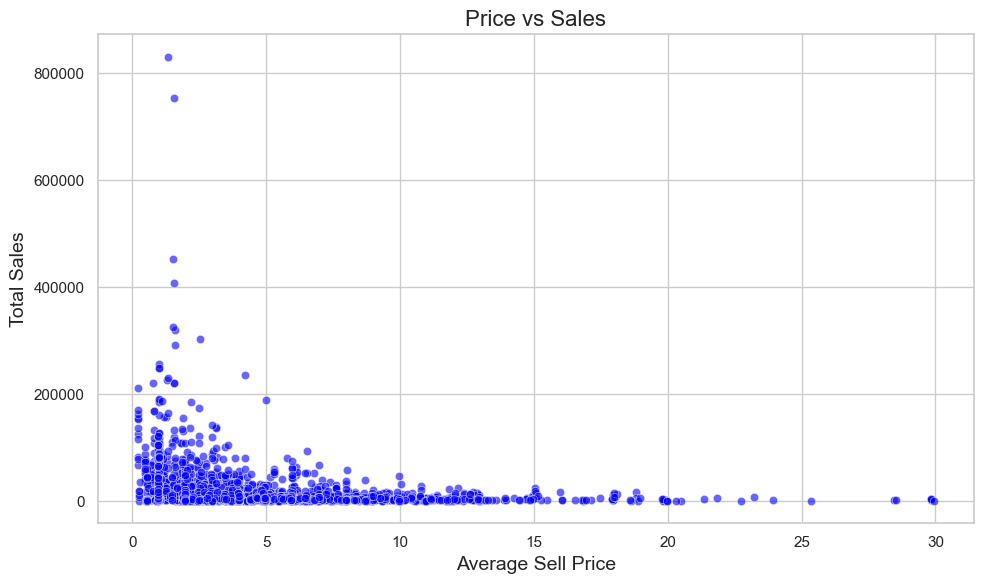

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Aggregate the data by 'item_id' to compute the average sell price and total sales
price_analysis = df_train_long.groupby('item_id')[['sell_price', 'sales']].agg({
    'sell_price': 'mean',
    'sales': 'sum'
}).reset_index()

sns.set_theme(style="whitegrid")

# scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=price_analysis,
    x='sell_price',
    y='sales',
    color='blue',  
    alpha=0.6      
)

# Enhance the plot with titles and labels
plt.title('Price vs Sales', fontsize=16)
plt.xlabel('Average Sell Price', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)


plt.tight_layout()
plt.show()
 

**Based on the visualization, we can see that the majority of item sell prices are below 20, with most items priced between 1 and 5**

#### Seasonal Analysis 

In [211]:
monthly_sales = df_train_long.groupby('month')['sales'].mean()
print("\nMonthly Sales Performance:")
print(monthly_sales.sort_values(ascending=False))




Monthly Sales Performance:
month
8     1.141937
9     1.129599
6     1.121383
7     1.114016
10    1.092942
2     1.087826
3     1.081574
4     1.069365
1     1.066627
11    1.060361
12    1.054216
5     1.030708
Name: sales, dtype: float64


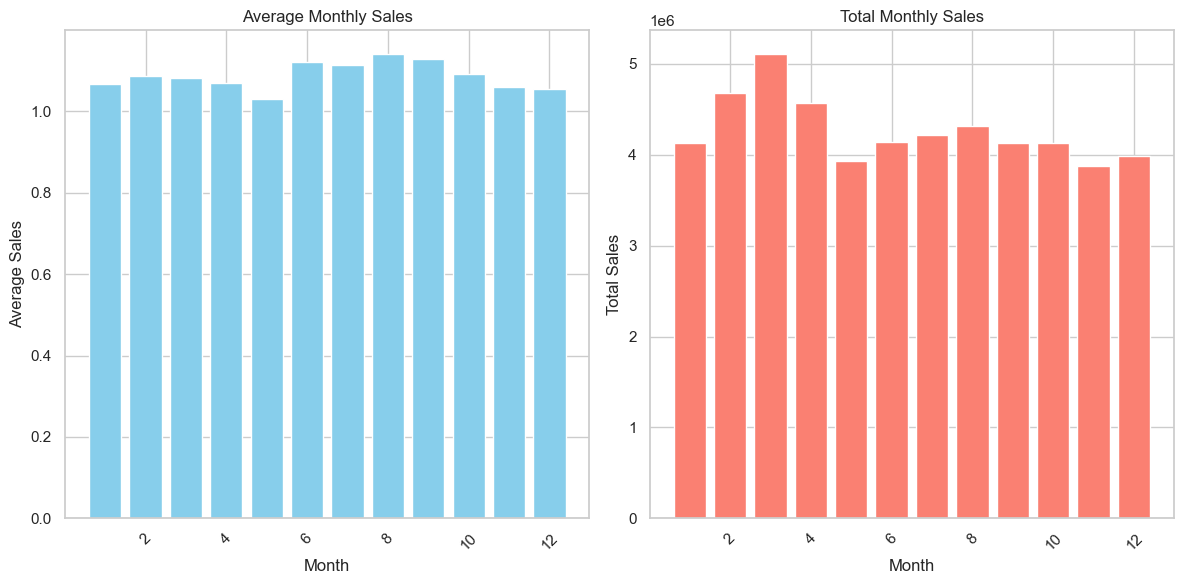


Monthly Sales Performance (Sorted by Total Sales):
    month  average_sales  total_sales
2       3       1.081574      5111464
1       2       1.087826      4676662
3       4       1.069365      4564690
7       8       1.141937      4317389
6       7       1.114016      4211828
5       6       1.121383      4137107
8       9       1.129599      4132976
9      10       1.092942      4132152
0       1       1.066627      4130225
11     12       1.054216      3985736
4       5       1.030708      3928286
10     11       1.060361      3879648


In [212]:
import matplotlib.pyplot as plt

# Group the data by 'month' and calculate the average and total sales
monthly_sales = df_train_long.groupby('month').agg({
    'sales': ['mean', 'sum']
}).reset_index()

# Flatten the MultiIndex columns
monthly_sales.columns = ['month', 'average_sales', 'total_sales']


# Plotting the Average and Total Monthly Sales
plt.figure(figsize=(12, 6))

# Plot Average Sales
plt.subplot(1, 2, 1)
plt.bar(monthly_sales['month'], monthly_sales['average_sales'], color='skyblue')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)

# Plot Total Sales
plt.subplot(1, 2, 2)
plt.bar(monthly_sales['month'], monthly_sales['total_sales'], color='salmon')
plt.title('Total Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Print the Monthly Sales Performance sorted by Total Sales in descending order
print("\nMonthly Sales Performance (Sorted by Total Sales):")
print(monthly_sales.sort_values(by='total_sales', ascending=False))

**February has the highest total sales, followed by March and April. The average monthly sales remain relatively stable throughout the year, with a slight increase during the summer season**

#### Day of Week Analysis

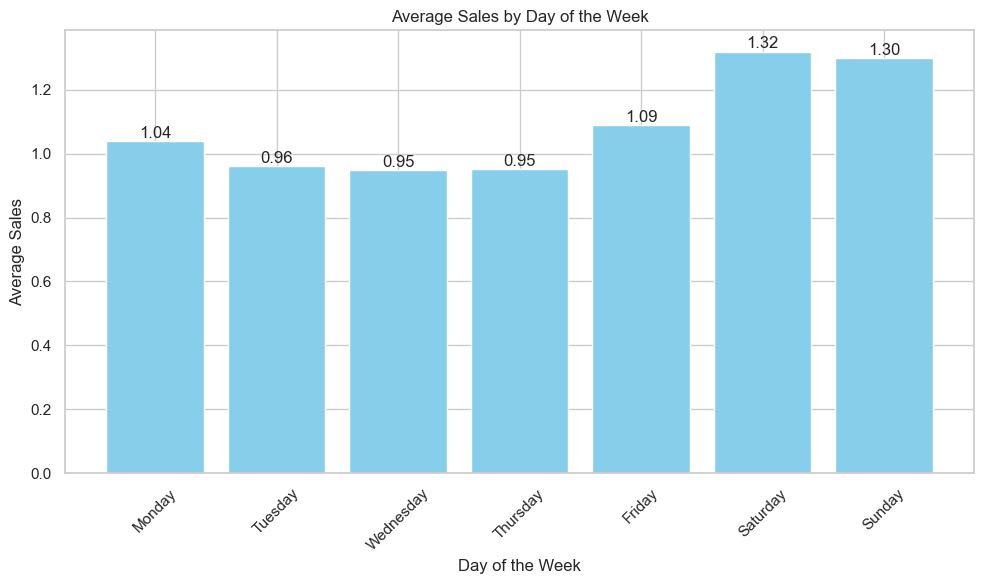


Average Sales by Day of Week:
  day_of_week     sales
5    Saturday  1.319158
6      Sunday  1.297348
4      Friday  1.088407
0      Monday  1.038248
1     Tuesday  0.960636
3    Thursday  0.952224
2   Wednesday  0.948517


In [213]:
day_sales = df_train_long.groupby('day_of_week')['sales'].mean().reset_index()

# day of week start from monday = 0 to sunday =6
day_mapping = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
day_sales['day_of_week'] = day_sales['day_of_week'].map(day_mapping)

# Ensure the days are ordered correctly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales['day_of_week'] = pd.Categorical(day_sales['day_of_week'], categories=days_order, ordered=True)
day_sales = day_sales.sort_values('day_of_week')

# Plotting the Average Sales by Day of Week
plt.figure(figsize=(10, 6))
plt.bar(day_sales['day_of_week'], day_sales['sales'], color='skyblue')
plt.title('Average Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.tight_layout()

# Adding data labels on top of each bar
for index, value in enumerate(day_sales['sales']):
    plt.text(index, value + 0.01, f'{value:.2f}', ha='center')

plt.show()

# Print the Average Sales sorted in descending order
print("\nAverage Sales by Day of Week:")
print(day_sales.sort_values(by='sales', ascending=False))



**Stores sell the most on Saturdays and Sundays. Weekday sales are lower, though Mondays and Fridays are a little better than Tuesdays, Wednesdays, and Thursdays.**

#### Weekend vs Weekday Analysis

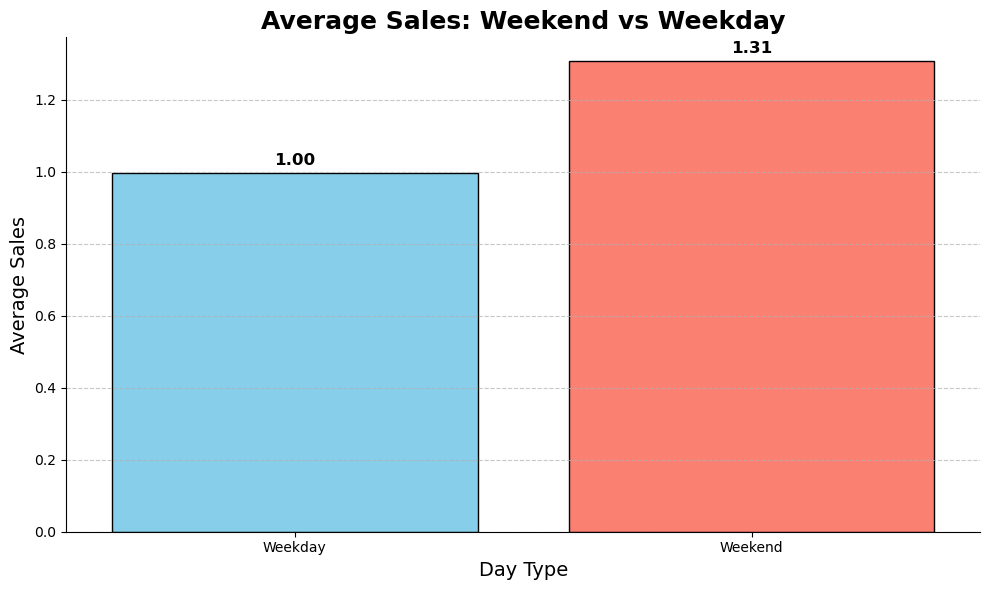

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#Calculate the average sales for weekends and weekdays
weekend_analysis = df_train_long.groupby('is_weekend')['sales'].mean().reset_index()

# Mapping 'is_weekend' to readable labels
weekend_analysis['Day Type'] = weekend_analysis['is_weekend'].map({0: 'Weekday', 1: 'Weekend'})

#Sort the data for consistent ordering
weekend_analysis = weekend_analysis.sort_values('is_weekend')


plt.figure(figsize=(10, 6))

#Create the barplot 
bar_plot = sns.barplot(
    x='Day Type',
    y='sales',
    data=weekend_analysis,
    edgecolor='black',
    errorbar=None  # Replaces ci=None
)
#color
custom_colors = ['skyblue', 'salmon'] 

# Apply the colors to the bars
for bar, color in zip(bar_plot.patches, custom_colors):
    bar.set_facecolor(color)

#plot with titles and labels
plt.title('Average Sales: Weekend vs Weekday', fontsize=18, weight='bold')
plt.xlabel('Day Type', fontsize=14)
plt.ylabel('Average Sales', fontsize=14)

#Add value labels on top of each bar
for index, row in weekend_analysis.iterrows():
    plt.text(
        index, 
        row['sales'] + (weekend_analysis['sales'].max() * 0.01), 
        f"{row['sales']:.2f}", 
        ha='center', 
        va='bottom', 
        fontsize=12,
        fontweight='bold',
        color='black'
    )


plt.grid(axis='y', linestyle='--', alpha=0.7)
sns.despine()
plt.tight_layout()
plt.show()

**Weekend sales are higher than weekday sales**

#### Yearly Trend Based On Total Sales

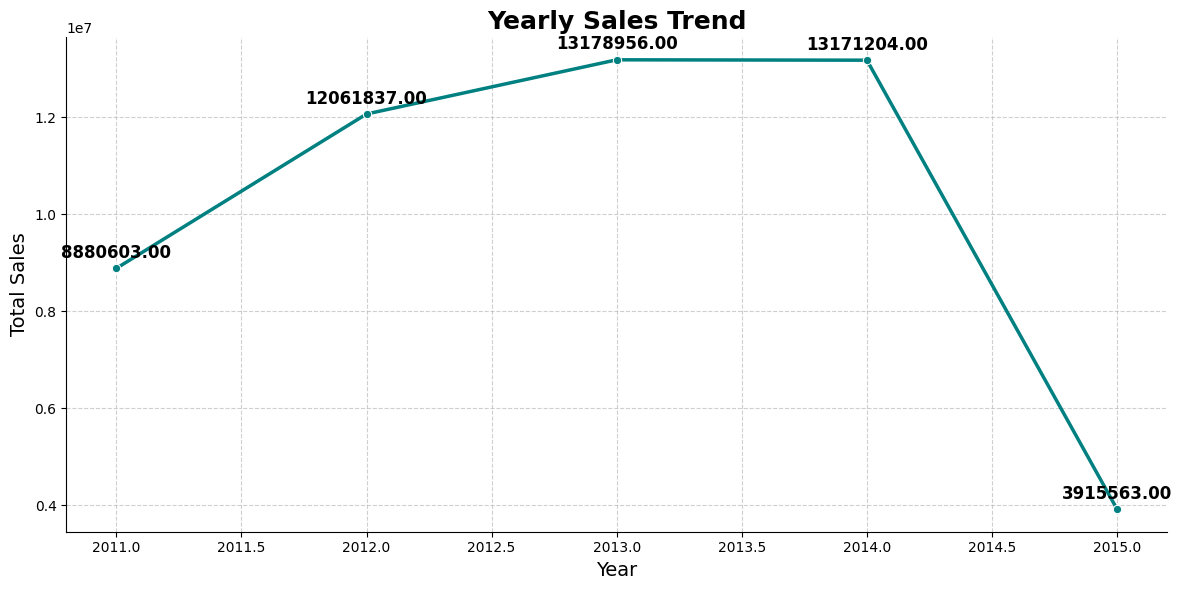

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the yearly total sales
yearly_sales = df_train_long.groupby('year')['sales'].sum().reset_index()

# Sort the data by year 
yearly_sales = yearly_sales.sort_values('year')

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Create the line plot using Seaborn
sns.lineplot(
    data=yearly_sales,
    x='year',
    y='sales',
    marker='o',
    color='teal',
    linewidth=2.5
)

# Enhance the plot with titles and labels
plt.title('Yearly Sales Trend', fontsize=18, weight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Sales', fontsize=14)

# Add gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Annotate each data point with the sales value
for x, y in zip(yearly_sales['year'], yearly_sales['sales']):
    plt.text(x, y + (yearly_sales['sales'].max() * 0.01), f"{y:.2f}", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')


sns.despine()
plt.tight_layout()
plt.show()


**Sales increased steadily from 2011 to 2013, reaching their peak. From 2013 to 2014, sales remained stable, then sharply declined**

#### Price Trend Over Time

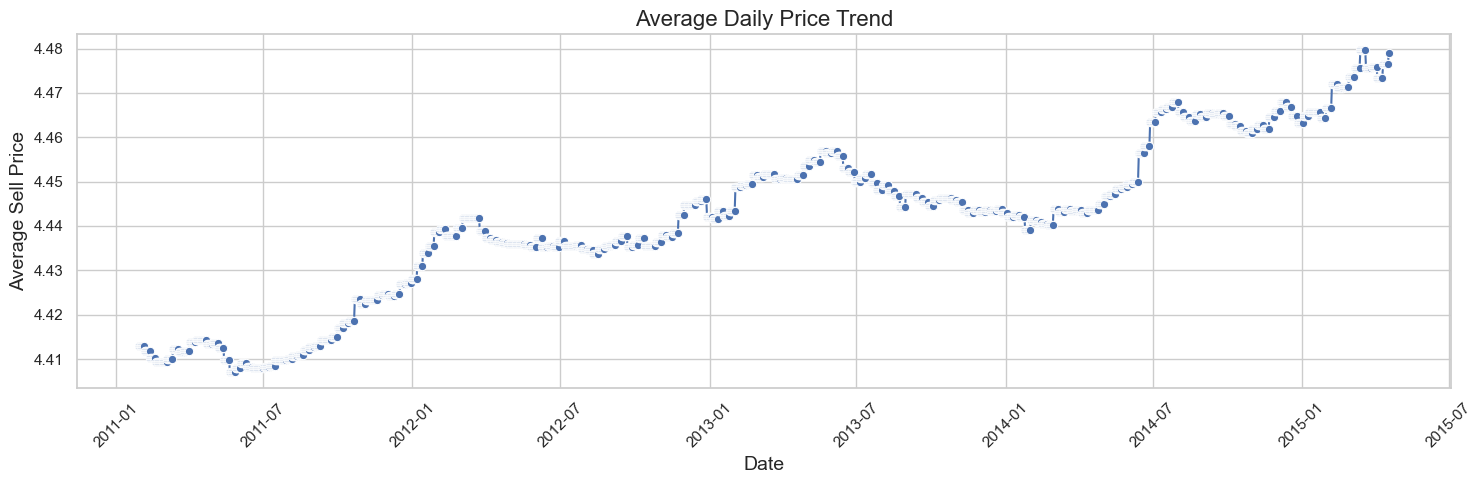

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate the average sell price per date
price_trend = df_train_long.groupby('date')['sell_price'].mean().reset_index()

# Set the Seaborn theme for better aesthetics
sns.set_theme(style="whitegrid")

# Create the line plot
plt.figure(figsize=(15, 5))
sns.lineplot(data=price_trend, x='date', y='sell_price', marker='o')

# Enhance the plot with titles and labels
plt.title('Average Daily Price Trend', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Sell Price', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()

**In the beginning, prices stayed mostly flat. Then they dropped a little before climbing higher over the years.**

#### Revenue Analysis


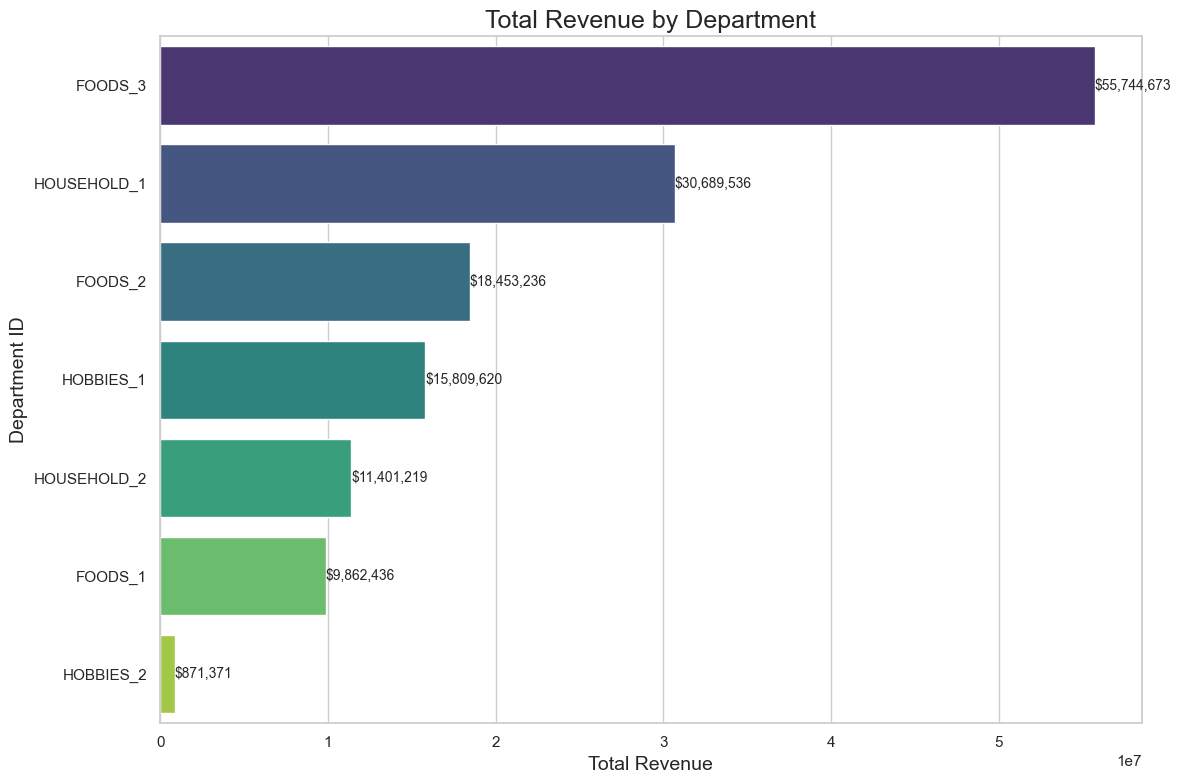

In [217]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calculate total revenue per department
revenue_by_dept = df_train_long.groupby('dept_id')['revenue'].sum().reset_index()

# Sort the departments by revenue in descending order
revenue_by_dept = revenue_by_dept.sort_values(by='revenue', ascending=False)

# Set the Seaborn theme and figure size
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the bar plot
ax = sns.barplot(
    data=revenue_by_dept,
    x='revenue',
    y='dept_id',
    hue='dept_id',  # Add hue parameter
    palette='viridis',
    legend=False  # Explicitly set legend to False
)

# Enhance the plot with titles and labels
plt.title('Total Revenue by Department', fontsize=18)
plt.xlabel('Total Revenue', fontsize=14)
plt.ylabel('Department ID', fontsize=14)

# Add value labels to each bar for clarity
for index, value in enumerate(revenue_by_dept['revenue']):
    plt.text(value, index, f'${value:,.0f}', va='center', fontsize=10)

plt.tight_layout()
plt.show()

**FOODS_3 made the most revenue, then HOUSEHOLD_1, then FOODS_2. HOBBIES_2 made the least. FOODS and HOUSEHOLD items earned the most revenue overall, while HOBBIES earned the least.**

In [62]:
df_train_long.head().T

,0,1,2,3,4
id,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_005_CA_1_evaluation
item_id,HOBBIES_1_001,HOBBIES_1_002,HOBBIES_1_003,HOBBIES_1_004,HOBBIES_1_005
dept_id,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1,HOBBIES_1
cat_id,HOBBIES,HOBBIES,HOBBIES,HOBBIES,HOBBIES
store_id,CA_1,CA_1,CA_1,CA_1,CA_1
state_id,CA,CA,CA,CA,CA
d,d_1,d_1,d_1,d_1,d_1
sales,0,0,0,0,0
date,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00,2011-01-29 00:00:00
wm_yr_wk,11101,11101,11101,11101,11101


In [63]:
df_test_long.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,sell_price,revenue,event_name,event_type,day_of_week,month,year,is_weekend
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,8.26,0.00,NoEvent,NoEvent,6,4,2015,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,3.97,0.00,NoEvent,NoEvent,6,4,2015,1
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,0,2015-04-19,11512,2.97,0.00,NoEvent,NoEvent,6,4,2015,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,4,2015-04-19,11512,4.64,18.56,NoEvent,NoEvent,6,4,2015,1
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,d_1542,3,2015-04-19,11512,2.88,8.64,NoEvent,NoEvent,6,4,2015,1


In [64]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47107050 entries, 0 to 47107049
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item_id      object        
 2   dept_id      object        
 3   cat_id       object        
 4   store_id     object        
 5   state_id     object        
 6   d            object        
 7   sales        int64         
 8   date         datetime64[ns]
 9   wm_yr_wk     int64         
 10  sell_price   float64       
 11  revenue      float64       
 12  event_name   object        
 13  event_type   object        
 14  day_of_week  int32         
 15  month        int32         
 16  year         int32         
 17  is_weekend   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(9)
memory usage: 5.8+ GB


In [65]:
df_train_long.shape

(47107050, 18)

In [66]:
df_test_long.shape

(12196000, 18)

In [67]:
df_test_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12196000 entries, 0 to 12195999
Data columns (total 18 columns):
 #   Column       Dtype         
---  ------       -----         
 0   id           object        
 1   item_id      object        
 2   dept_id      object        
 3   cat_id       object        
 4   store_id     object        
 5   state_id     object        
 6   d            object        
 7   sales        int64         
 8   date         datetime64[ns]
 9   wm_yr_wk     int64         
 10  sell_price   float64       
 11  revenue      float64       
 12  event_name   object        
 13  event_type   object        
 14  day_of_week  int32         
 15  month        int32         
 16  year         int32         
 17  is_weekend   int64         
dtypes: datetime64[ns](1), float64(2), int32(3), int64(3), object(9)
memory usage: 1.5+ GB


In [19]:
features_to_drop = ['id','d','wm_yr_wk','event_name','sales','sell_price'
    ]

# Drop features from df_train_long
df_train_long = df_train_long.drop(columns=features_to_drop)

# Drop features from df_test_long
df_test_long = df_test_long.drop(columns=features_to_drop)

# Print the shapes of the dataframes before and after dropping the features
print(f"Shape of df_train after dropping features: {df_train_long.shape}")
print(f"Shape of df_test after dropping features: {df_test_long.shape}")

#verify the columns were dropped
print("\nRemaining columns in df_train")
print(df_train_long.columns.tolist())

Shape of df_train after dropping features: (14482750, 12)
Shape of df_test after dropping features: (12196000, 12)

Remaining columns in df_train
['item_id', 'dept_id', 'cat_id', 'store_id', 'state_id', 'date', 'revenue', 'event_type', 'day_of_week', 'month', 'year', 'is_weekend']


In [225]:
df_train_long.sample(5).T


,3419895,31711982,41738877,5953291,30906307
item_id,FOODS_2_140,FOODS_3_158,HOUSEHOLD_2_020,FOODS_1_033,FOODS_1_033
dept_id,FOODS_2,FOODS_3,HOUSEHOLD_2,FOODS_1,FOODS_1
cat_id,FOODS,FOODS,HOUSEHOLD,FOODS,FOODS
store_id,CA_2,CA_1,WI_3,CA_3,TX_3
state_id,CA,CA,WI,CA,TX
date,2011-05-20 00:00:00,2013-12-02 00:00:00,2014-10-24 00:00:00,2011-08-11 00:00:00,2013-11-05 00:00:00
revenue,0.0,0.0,0.0,0.0,0.0
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,4,0,4,3,1
month,5,12,10,8,11


In [69]:
df_test_long.tail().T

,12195995,12195996,12195997,12195998,12195999
item_id,FOODS_3_823,FOODS_3_824,FOODS_3_825,FOODS_3_826,FOODS_3_827
dept_id,FOODS_3,FOODS_3,FOODS_3,FOODS_3,FOODS_3
cat_id,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,WI_3,WI_3,WI_3,WI_3,WI_3
state_id,WI,WI,WI,WI,WI
date,2016-05-22 00:00:00,2016-05-22 00:00:00,2016-05-22 00:00:00,2016-05-22 00:00:00,2016-05-22 00:00:00
revenue,2.98,0.0,7.96,0.0,1.0
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,6,6,6,6,6
month,5,5,5,5,5


**The entire dataset will not be used for model training. To capture recent trends and ensure accurate predictions, data from 2014 and 2015 will be used for training**

In [21]:
# Filter the dataset for years 2014 and 2015
filtered_df = df_train_long[df_train_long['year'].isin([2014, 2015])]

# Replace the original training dataset with the filtered one
df_train_long = filtered_df

# Print the result
print(df_train_long.shape)

(14482750, 12)


In [71]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14482750 entries, 32624300 to 47107049
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   item_id      object        
 1   dept_id      object        
 2   cat_id       object        
 3   store_id     object        
 4   state_id     object        
 5   date         datetime64[ns]
 6   revenue      float64       
 7   event_type   object        
 8   day_of_week  int32         
 9   month        int32         
 10  year         int32         
 11  is_weekend   int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 1.2+ GB


In [72]:
# Group by item_id and check if all revenue values are 0
zero_revenue_items_train_long = df_train_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())

# Filter to get only the item_ids where all revenue is 0
always_zero_revenue_train_long = zero_revenue_items_train_long[zero_revenue_items_train_long].index.tolist()

# Print the result
print("Item IDs with always 0 revenue in df_train_long:")
print(always_zero_revenue_train_long)
print(f"\nNumber of items with always 0 revenue in df_train_long: {len(always_zero_revenue_train_long)}")

Item IDs with always 0 revenue in df_train_long:
['HOBBIES_1_077', 'HOUSEHOLD_1_512', 'HOUSEHOLD_2_162']

Number of items with always 0 revenue in df_train_long: 3


/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_12461/927751204.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zero_revenue_items_train_long = df_train_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())


In [23]:
# Check for lost item_ids
df_train_long_nonzero = df_train_long[df_train_long['revenue'] != 0]

#check for lost item_ids
original_items_train_long = set(df_train_long['item_id'].unique())
nonzero_items_train_long = set(df_train_long_nonzero['item_id'].unique())
lost_items_train_long = original_items_train_long - nonzero_items_train_long

print(f"\nNumber of unique item_ids in original df_train_long: {len(original_items_train_long)}")
print(f"Number of unique item_ids in filtered df_train_long_nonzero: {len(nonzero_items_train_long)}")
print(f"Number of item_ids lost in df_train_long: {len(lost_items_train_long)}")


Number of unique item_ids in original df_train_long: 3049
Number of unique item_ids in filtered df_train_long_nonzero: 3046
Number of item_ids lost in df_train_long: 3


In [74]:
# Group by item_id and check if all revenue values are 0
zero_revenue_items_test_long = df_test_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())

# Filter to get only the item_ids where all revenue is 0
always_zero_revenue_test_long = zero_revenue_items_test_long[zero_revenue_items_test_long].index.tolist()

# Print the result
print("Item IDs with always 0 revenue in df_test_long:")
print(always_zero_revenue_test_long)
print(f"\nNumber of items with always 0 revenue in df_test_long: {len(always_zero_revenue_test_long)}")


Item IDs with always 0 revenue in df_test_long:
[]

Number of items with always 0 revenue in df_test_long: 0


/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_12461/3305233829.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  zero_revenue_items_test_long = df_test_long.groupby('item_id').apply(lambda x: (x['revenue'] == 0).all())


In [75]:
# First, create df_test_long_nonzero 
df_test_long_nonzero = df_test_long[df_test_long['revenue'] != 0]

# Check for lost item_ids
original_items_test_long = set(df_test_long['item_id'].unique())
nonzero_items_test_long = set(df_test_long_nonzero['item_id'].unique())
lost_items_test_long = original_items_test_long - nonzero_items_test_long

print(f"\nNumber of unique item_ids in original df_test_long: {len(original_items_test_long)}")
print(f"Number of unique item_ids in filtered df_test_long_nonzero: {len(nonzero_items_test_long)}")
print(f"Number of item_ids lost in df_test_long: {len(lost_items_test_long)}")



Number of unique item_ids in original df_test_long: 3049
Number of unique item_ids in filtered df_test_long_nonzero: 3049
Number of item_ids lost in df_test_long: 0


In [76]:
# Permanently remove rows with zero revenue
df_train_long = df_train_long[df_train_long['revenue'] != 0]
df_test_long = df_test_long[df_test_long['revenue'] != 0]

print("Final shapes after permanently removing zero revenue rows:")
print("df_train_long shape:", df_train_long.shape)
print("df_test_long shape:", df_test_long.shape)

# Verify no zero revenue rows remain
print("\nVerifying no zero revenue rows remain:")
print("Zero revenue rows in df_train_long:", (df_train_long['revenue'] == 0).sum())
print("Zero revenue rows in df_test_long:", (df_test_long['revenue'] == 0).sum())

Final shapes after permanently removing zero revenue rows:
df_train_long shape: (5148832, 12)
df_test_long shape: (4954566, 12)

Verifying no zero revenue rows remain:
Zero revenue rows in df_train_long: 0
Zero revenue rows in df_test_long: 0


In [77]:
df_test_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4954566 entries, 3 to 12195999
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   item_id      object        
 1   dept_id      object        
 2   cat_id       object        
 3   store_id     object        
 4   state_id     object        
 5   date         datetime64[ns]
 6   revenue      float64       
 7   event_type   object        
 8   day_of_week  int32         
 9   month        int32         
 10  year         int32         
 11  is_weekend   int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 434.7+ MB


In [78]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5148832 entries, 32624300 to 47107049
Data columns (total 12 columns):
 #   Column       Dtype         
---  ------       -----         
 0   item_id      object        
 1   dept_id      object        
 2   cat_id       object        
 3   store_id     object        
 4   state_id     object        
 5   date         datetime64[ns]
 6   revenue      float64       
 7   event_type   object        
 8   day_of_week  int32         
 9   month        int32         
 10  year         int32         
 11  is_weekend   int64         
dtypes: datetime64[ns](1), float64(1), int32(3), int64(1), object(6)
memory usage: 451.7+ MB


In [79]:
# List of object columns, excluding 'item_id'
object_columns = ['dept_id', 'cat_id', 'store_id', 'state_id', 'event_type']

# Getting the unique values for each column
unique_values = {col: df_test_long[col].unique() for col in object_columns}

# Display the unique values for each column
for col, values in unique_values.items():
    print(f"Unique values in {col}: {values}")


Unique values in dept_id: ['HOBBIES_1' 'HOBBIES_2' 'HOUSEHOLD_1' 'HOUSEHOLD_2' 'FOODS_1' 'FOODS_2'
 'FOODS_3']
Unique values in cat_id: ['HOBBIES' 'HOUSEHOLD' 'FOODS']
Unique values in store_id: ['CA_1' 'CA_2' 'CA_3' 'CA_4' 'TX_1' 'TX_2' 'TX_3' 'WI_1' 'WI_2' 'WI_3']
Unique values in state_id: ['CA' 'TX' 'WI']
Unique values in event_type: ['NoEvent' 'Cultural' 'National' 'Sporting' 'Religious']


In [111]:
df_test_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954566 entries, 0 to 4954565
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   item_id      object 
 1   dept_id      object 
 2   cat_id       object 
 3   store_id     object 
 4   state_id     object 
 5   date         object 
 6   revenue      float64
 7   event_type   object 
 8   day_of_week  int64  
 9   month        int64  
 10  year         int64  
 11  is_weekend   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 453.6+ MB


In [112]:
df_train_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5148832 entries, 0 to 5148831
Data columns (total 12 columns):
 #   Column       Dtype  
---  ------       -----  
 0   item_id      object 
 1   dept_id      object 
 2   cat_id       object 
 3   store_id     object 
 4   state_id     object 
 5   date         object 
 6   revenue      float64
 7   event_type   object 
 8   day_of_week  int64  
 9   month        int64  
 10  year         int64  
 11  is_weekend   int64  
dtypes: float64(1), int64(4), object(7)
memory usage: 471.4+ MB


In [113]:
# Calculate mean revenue per item_id
item_id_mean_revenue = df_train_long.groupby('item_id')['revenue'].mean()
global_mean_revenue = df_train_long['revenue'].mean()

# Map mean revenue to item_id in training data
df_train_long['item_id_encoded'] = df_train_long['item_id'].map(item_id_mean_revenue)

In [114]:
# Create a label encoder for 'store_id'
le_store_id = LabelEncoder()
df_train_long['store_id_encoded'] = le_store_id.fit_transform(df_train_long['store_id'])

In [115]:
# Create a label encoder for 'cat_id'
le_cat_id = LabelEncoder()
df_train_long['cat_id_encoded'] = le_cat_id.fit_transform(df_train_long['cat_id'])

In [116]:
# Create a label encoder for 'state_id'
le_state_id = LabelEncoder()
df_train_long['state_id_encoded'] = le_state_id.fit_transform(df_train_long['state_id'])

In [117]:
# Create a label encoder for 'event_type'
le_event_type = LabelEncoder()
df_train_long['event_type_encoded'] = le_event_type.fit_transform(df_train_long['event_type'])

In [118]:
# Convert 'day_of_week' from int to day name
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_train_long['day_of_week_name'] = df_train_long['day_of_week'].map(day_mapping)

# One-Hot Encode 'day_of_week_name'
df_train_long = pd.get_dummies(df_train_long, columns=['day_of_week_name'], drop_first=False)

In [119]:
# Create a label encoder for 'dept_id'
le_dept_id = LabelEncoder()
df_train_long['dept_id_encoded'] = le_dept_id.fit_transform(df_train_long['dept_id'])

In [129]:
df_train_long.shape

(5148832, 36)

In [139]:
df_test_reduced.head().T

,1651965,1015212,1321609,2492499,389106
item_id,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001
dept_id,FOODS_1,FOODS_1,FOODS_1,FOODS_1,FOODS_1
cat_id,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,TX_1,WI_1,CA_2,TX_2,WI_1
state_id,TX,WI,CA,TX,WI
date,2015-09-03 00:00:00,2015-07-12 00:00:00,2015-08-07 00:00:00,2015-11-10 00:00:00,2015-05-21 00:00:00
revenue,8.96,8.96,2.24,4.48,2.24
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,3,6,4,1,3
year,2015,2015,2015,2015,2015


In [121]:
# For both training and test datasets
df_train_long = pd.get_dummies(df_train_long, columns=['month'], prefix='month', drop_first=False)
df_test_long = pd.get_dummies(df_test_long, columns=['month'], prefix='month', drop_first=False)


In [122]:
import joblib

# Save encoders and other objects in the current working directory
joblib.dump(le_store_id, 'store_id_encoder.joblib')
joblib.dump(le_dept_id, 'dept_id_encoder.joblib')
joblib.dump(le_cat_id, 'cat_id_encoder.joblib')
joblib.dump(le_state_id, 'state_id_encoder.joblib')
joblib.dump(le_event_type, 'event_type_encoder.joblib')
joblib.dump(item_id_mean_revenue.to_dict(), 'item_id_mean_revenue.joblib')
joblib.dump(global_mean_revenue, 'global_mean_revenue.joblib')


['global_mean_revenue.joblib']

In [169]:
# Extract unique item_ids and store_ids
item_ids = df_train['item_id'].unique().tolist()
store_ids = df_train['store_id'].unique().tolist()


In [171]:
# Save the lists
joblib.dump(item_ids, 'item_ids.joblib')
joblib.dump(store_ids, 'store_ids.joblib')

['store_ids.joblib']

In [123]:
# Function to handle unseen categories
def transform_with_unknown(encoder, series):
    classes = encoder.classes_
    return series.map(lambda s: encoder.transform([s])[0] if s in classes else -1)

# Encode 'store_id'
df_test_long['store_id_encoded'] = transform_with_unknown(le_store_id, df_test_long['store_id'])

# Encode 'dept_id'
df_test_long['dept_id_encoded'] = transform_with_unknown(le_dept_id, df_test_long['dept_id'])

# Encode 'cat_id'
df_test_long['cat_id_encoded'] = transform_with_unknown(le_cat_id, df_test_long['cat_id'])

# Encode 'state_id'
df_test_long['state_id_encoded'] = transform_with_unknown(le_state_id, df_test_long['state_id'])

# Encode 'event_type'
df_test_long['event_type_encoded'] = transform_with_unknown(le_event_type, df_test_long['event_type'])

In [124]:
# Map mean revenue to item_id in test data
df_test_long['item_id_encoded'] = df_test_long['item_id'].map(item_id_mean_revenue)
# Handle unseen item_ids by replacing NaNs with global mean revenue
df_test_long['item_id_encoded'].fillna(global_mean_revenue, inplace=True)

/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_12461/804307422.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_test_long['item_id_encoded'].fillna(global_mean_revenue, inplace=True)


In [125]:
# Convert 'day_of_week' from int to day name
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_test_long['day_of_week_name'] = df_test_long['day_of_week'].map(day_mapping)

# One-Hot Encode 'day_of_week_name'
df_test_long = pd.get_dummies(df_test_long, columns=['day_of_week_name'], drop_first=False)



In [130]:
# Define sampling parameters
sampling_fraction_test = 0.1  # Sample 10% of the test data
sampling_fraction_train = 0.4  # Sample 40% of the training data to achieve a 4:1 ratio

min_samples = 5         

def stratified_sample(df, group_col, frac, min_samples):
    """
    Performs stratified sampling on the DataFrame based on group_col.
    Ensures each group has at least min_samples after sampling.
    """
    sampled_df = df.groupby(group_col, group_keys=False).apply(
        lambda x: x.sample(frac=frac, random_state=42) if len(x) * frac >= min_samples else x.sample(n=min_samples, replace=True, random_state=42)
    )
    return sampled_df

# Apply stratified sampling to test dataset first
df_test_reduced = stratified_sample(df_test_long, 'item_id', sampling_fraction_test, min_samples)

# Then, sample the training set to be 4 times the test set
desired_train_size = df_test_reduced.shape[0] * 4
current_train_size = df_train_long.shape[0]

# Calculate the required sampling fraction for the training set
sampling_fraction_train = desired_train_size / current_train_size

# Ensure that the sampling fraction does not exceed 1.0
sampling_fraction_train = min(sampling_fraction_train, 1.0)

df_train_reduced = stratified_sample(df_train_long, 'item_id', sampling_fraction_train, min_samples)

print(f"\nReduced Training Set Shape: {df_train_reduced.shape}")
print(f"Reduced Testing Set Shape: {df_test_reduced.shape}")

# Verify that all item_ids are present in both sets
missing_train_item_ids = set(df_train_long['item_id'].unique()) - set(df_train_reduced['item_id'].unique())
missing_test_item_ids = set(df_test_long['item_id'].unique()) - set(df_test_reduced['item_id'].unique())

print(f"\nMissing item_ids in Reduced Training Set: {len(missing_train_item_ids)}")
print(f"Missing item_ids in Reduced Testing Set: {len(missing_test_item_ids)}")

/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_12461/2567363698.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(group_col, group_keys=False).apply(
/var/folders/rn/4jcnz_ks4mg00qq01dxb91yw0000gn/T/ipykernel_12461/2567363698.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(group_col, group_keys=False).apply(



Reduced Training Set Shape: (1981759, 36)
Reduced Testing Set Shape: (495442, 36)

Missing item_ids in Reduced Training Set: 0
Missing item_ids in Reduced Testing Set: 0


In [131]:
import pandas as pd
import numpy as np

# Convert the 'date' column to datetime format
df_train_reduced['date'] = pd.to_datetime(df_train_reduced['date'])

# Sort the reduced training data by date to maintain temporal order
df_train_reduced = df_train_reduced.sort_values('date')

# Define the cutoff date for splitting (75% for training, 25% for validation)
unique_dates = df_train_reduced['date'].unique()
unique_dates_sorted = np.sort(unique_dates)
cutoff_index = int(len(unique_dates_sorted) * 0.75)  # 75% for training
cutoff_date = unique_dates_sorted[cutoff_index]

print(f"\nCutoff Date for Train-Validation Split: {cutoff_date}")

# Split the data
train_set = df_train_reduced[df_train_reduced['date'] < cutoff_date]
validation_set = df_train_reduced[df_train_reduced['date'] >= cutoff_date]

# Check the shape of the training and validation sets
print(f"Training Set Shape: {train_set.shape}")
print(f"Validation Set Shape: {validation_set.shape}")

# Verify that all item_ids are present in both sets
train_item_ids = set(train_set['item_id'].unique())
validation_item_ids = set(validation_set['item_id'].unique())

missing_in_validation = train_item_ids - validation_item_ids
missing_in_train = validation_item_ids - train_item_ids

print(f"\nNumber of item_ids missing in validation set: {len(missing_in_validation)}")
print(f"Number of item_ids missing in training set: {len(missing_in_train)}")



Cutoff Date for Train-Validation Split: 2014-12-21T00:00:00.000000000
Training Set Shape: (1474597, 36)
Validation Set Shape: (507162, 36)

Number of item_ids missing in validation set: 9
Number of item_ids missing in training set: 42


In [132]:
# Handle missing item_ids in validation set
if len(missing_in_validation) > 0:
    # List of missing item_ids
    missing_item_ids = list(missing_in_validation)
    
    for item_id in missing_item_ids:
        # Select a few recent records of the missing item_id from training set
        item_records = train_set[train_set['item_id'] == item_id].sort_values('date', ascending=False)
        n_samples = min(5, len(item_records))  
        samples_to_move = item_records.head(n_samples)
        
        # Append these samples to the validation set using pd.concat to avoid FutureWarning
        validation_set = pd.concat([validation_set, samples_to_move], ignore_index=True)
        
        # Remove these samples from the training set
        train_set = train_set.drop(samples_to_move.index)
    
    # verifying the presence of all item_ids in both sets
    train_item_ids = set(train_set['item_id'].unique())
    validation_item_ids = set(validation_set['item_id'].unique())
    
    missing_in_validation = train_item_ids - validation_item_ids
    missing_in_train = validation_item_ids - train_item_ids
    
    print(f"After Adjustment - Missing in Validation: {len(missing_in_validation)}")
    print(f"After Adjustment - Missing in Training: {len(missing_in_train)}")

print(f"Final Training Set Shape: {train_set.shape}")
print(f"Final Validation Set Shape: {validation_set.shape}")

After Adjustment - Missing in Validation: 0
After Adjustment - Missing in Training: 42
Final Training Set Shape: (1474552, 36)
Final Validation Set Shape: (507207, 36)


In [133]:
def stratified_sample_split(df, group_col, train_frac, val_frac, min_train=1, min_val=1):
    """
    Splits the DataFrame into training and validation sets with stratification.
    Ensures each group has at least min_train in training and min_val in validation.
    """
    train_list = []
    val_list = []
    
    for name, group in df.groupby(group_col):
        n_train = max(int(len(group) * train_frac), min_train)
        n_val = max(int(len(group) * val_frac), min_val)
        
        # Adjust if total exceeds group size
        if n_train + n_val > len(group):
            n_val = len(group) - n_train
        
        # Sample training and validation
        train_samples = group.sample(n=n_train, random_state=42)
        val_samples = group.drop(train_samples.index).sample(n=n_val, random_state=42)
        
        train_list.append(train_samples)
        val_list.append(val_samples)
    
    train_df = pd.concat(train_list).reset_index(drop=True)
    val_df = pd.concat(val_list).reset_index(drop=True)
    
    return train_df, val_df

# Define train-validation split fractions
train_frac = 0.75
val_frac = 0.25

# Perform the split using the custom function
train_set, validation_set = stratified_sample_split(df_train_reduced, 'item_id', train_frac, val_frac, min_train=1, min_val=1)

print(f"\nFinal Training Set Shape: {train_set.shape}")
print(f"Final Validation Set Shape: {validation_set.shape}")

# Verify that all item_ids are present in both sets
train_item_ids = set(train_set['item_id'].unique())
validation_item_ids = set(validation_set['item_id'].unique())

missing_in_validation = train_item_ids - validation_item_ids
missing_in_train = validation_item_ids - train_item_ids

print(f"Number of item_ids missing in validation set: {len(missing_in_validation)}")
print(f"Number of item_ids missing in training set: {len(missing_in_train)}")


Final Training Set Shape: (1485173, 36)
Final Validation Set Shape: (494293, 36)
Number of item_ids missing in validation set: 0
Number of item_ids missing in training set: 0


In [138]:
print("\nFinal Training Set Data Types:")
print(train_set.dtypes)

print("\nFinal Validation Set Data Types:")
print(validation_set.dtypes)

df_test_reduced['date'] = pd.to_datetime(df_test_reduced['date'])

print("\nFinal Testing Set Data Types:")
print(df_test_reduced.dtypes)


print("\nTraining Set Revenue Statistics:")
print(train_set['revenue'].describe())

print("\nValidation Set Revenue Statistics:")
print(validation_set['revenue'].describe())


print("\nTraining Set Revenue Statistics:")
print(df_test_reduced['revenue'].describe())


Final Training Set Data Types:
item_id                               object
dept_id                               object
cat_id                                object
store_id                              object
state_id                              object
date                          datetime64[ns]
revenue                              float64
event_type                            object
day_of_week                            int64
year                                   int64
is_weekend                             int64
item_id_encoded                      float64
store_id_encoded                       int64
cat_id_encoded                         int64
state_id_encoded                       int64
event_type_encoded                     int64
day_of_week_name_Friday                 bool
day_of_week_name_Monday                 bool
day_of_week_name_Saturday               bool
day_of_week_name_Sunday                 bool
day_of_week_name_Thursday               bool
day_of_week_name_Tuesda

In [141]:
# Save the processed datasets
train_set.to_csv('df_train_reduced.csv', index=False)
validation_set.to_csv('df_validation_reduced.csv', index=False)
df_test_reduced.to_csv('df_test_reduced.csv', index=False)

print("\nProcessed datasets saved successfully.")


Processed datasets saved successfully.


#### Final Dataset Before Model Training

In [173]:
df_train = pd.read_csv('../../data/processed/df_train_reduced.csv')
df_val = pd.read_csv('../../data/processed/df_validation_reduced.csv')
df_test = pd.read_csv('../../data/processed/df_test_reduced.csv')

In [174]:
df_train.head().T


,0,1,2,3,4
item_id,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001
dept_id,FOODS_1,FOODS_1,FOODS_1,FOODS_1,FOODS_1
cat_id,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,WI_1,WI_1,CA_2,TX_2,WI_3
state_id,WI,WI,CA,TX,WI
date,2014-10-02,2014-04-18,2014-10-14,2014-06-22,2014-05-12
revenue,2.24,6.72,2.24,6.72,2.24
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,3,4,1,6,0
year,2014,2014,2014,2014,2014


In [146]:
features_to_drop = ['item_id', 'date','dept_id','cat_id','store_id','state_id','event_type','date','day_of_week']

# Drop features from df_train
df_train = df_train.drop(columns=features_to_drop)

# Drop features from df_val
df_val = df_val.drop(columns=features_to_drop)

# Drop features from df_test
df_test = df_test.drop(columns=features_to_drop)

# Print the shapes of the dataframes after dropping the features
print(f"Shape of df_train after dropping features: {df_train.shape}")
print(f"Shape of df_val after dropping features: {df_val.shape}")
print(f"Shape of df_test after dropping features: {df_test.shape}")

# Verify the columns were dropped
print("\nRemaining columns in df_train:")
print(df_train.columns.tolist())
print("\nRemaining columns in df_val:")
print(df_val.columns.tolist())
print("\nRemaining columns in df_test:")
print(df_test.columns.tolist())

Shape of df_train after dropping features: (1485173, 28)
Shape of df_val after dropping features: (494293, 28)
Shape of df_test after dropping features: (495442, 28)

Remaining columns in df_train:
['revenue', 'year', 'is_weekend', 'item_id_encoded', 'store_id_encoded', 'cat_id_encoded', 'state_id_encoded', 'event_type_encoded', 'day_of_week_name_Friday', 'day_of_week_name_Monday', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_name_Thursday', 'day_of_week_name_Tuesday', 'day_of_week_name_Wednesday', 'dept_id_encoded', 'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12']

Remaining columns in df_val:
['revenue', 'year', 'is_weekend', 'item_id_encoded', 'store_id_encoded', 'cat_id_encoded', 'state_id_encoded', 'event_type_encoded', 'day_of_week_name_Friday', 'day_of_week_name_Monday', 'day_of_week_name_Saturday', 'day_of_week_name_Sunday', 'day_of_week_name_Thursday', 'day_of_week_nam

In [147]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485173 entries, 0 to 1485172
Data columns (total 28 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   revenue                     1485173 non-null  float64
 1   year                        1485173 non-null  int64  
 2   is_weekend                  1485173 non-null  int64  
 3   item_id_encoded             1485173 non-null  float64
 4   store_id_encoded            1485173 non-null  int64  
 5   cat_id_encoded              1485173 non-null  int64  
 6   state_id_encoded            1485173 non-null  int64  
 7   event_type_encoded          1485173 non-null  int64  
 8   day_of_week_name_Friday     1485173 non-null  bool   
 9   day_of_week_name_Monday     1485173 non-null  bool   
 10  day_of_week_name_Saturday   1485173 non-null  bool   
 11  day_of_week_name_Sunday     1485173 non-null  bool   
 12  day_of_week_name_Thursday   1485173 non-null  bool   
 1

In [148]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495442 entries, 0 to 495441
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   revenue                     495442 non-null  float64
 1   year                        495442 non-null  int64  
 2   is_weekend                  495442 non-null  int64  
 3   month_1                     495442 non-null  bool   
 4   month_2                     495442 non-null  bool   
 5   month_3                     495442 non-null  bool   
 6   month_4                     495442 non-null  bool   
 7   month_5                     495442 non-null  bool   
 8   month_6                     495442 non-null  bool   
 9   month_7                     495442 non-null  bool   
 10  month_8                     495442 non-null  bool   
 11  month_9                     495442 non-null  bool   
 12  month_10                    495442 non-null  bool   
 13  month_11      

In [172]:
df_train.head().T

,0,1,2,3,4
item_id,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001,FOODS_1_001
dept_id,FOODS_1,FOODS_1,FOODS_1,FOODS_1,FOODS_1
cat_id,FOODS,FOODS,FOODS,FOODS,FOODS
store_id,WI_1,WI_1,CA_2,TX_2,WI_3
state_id,WI,WI,CA,TX,WI
date,2014-10-02,2014-04-18,2014-10-14,2014-06-22,2014-05-12
revenue,2.24,6.72,2.24,6.72,2.24
event_type,NoEvent,NoEvent,NoEvent,NoEvent,NoEvent
day_of_week,3,4,1,6,0
year,2014,2014,2014,2014,2014


In [149]:
# Define features and target
features = [
    'item_id_encoded',
    'store_id_encoded',
    'dept_id_encoded',
    'cat_id_encoded',
    'state_id_encoded',
    'event_type_encoded',
    'year',
    'is_weekend',
    # One-hot encoded day of week names
    'day_of_week_name_Friday',
    'day_of_week_name_Monday',
    'day_of_week_name_Saturday',
    'day_of_week_name_Sunday',
    'day_of_week_name_Thursday',
    'day_of_week_name_Tuesday',
    'day_of_week_name_Wednesday',
    # One-hot encoded months
    'month_1',
    'month_2',
    'month_3',
    'month_4',
    'month_5',
    'month_6',
    'month_7',
    'month_8',
    'month_9',
    'month_10',
    'month_11',
    'month_12'
]

target = 'revenue'



In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Prepare training, validation, and test sets
X_train = df_train[features]
y_train = df_train[target]

X_val = df_val[features]
y_val = df_val[target]

X_test = df_test[features]
y_test = df_test[target]  

In [155]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, root_mean_squared_error

# Set initial parameters before training the model
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,  # Suppress output
    'boosting_type': 'gbdt',  # Gradient Boosting Decision Tree
    'seed': 42,  # Set seed for reproducibility
    'num_threads': -1  # Use all available CPU cores
}

# Create LightGBM dataset objects
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_val, label=y_val, reference=train_data)

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, valid_data],
    num_boost_round=1000,
    callbacks=[lgb.early_stopping(stopping_rounds=50)]
)

# Predict on validation set using the best iteration
y_val_pred = model.predict(X_val, num_iteration=model.best_iteration)

# Calculate evaluation metrics
mae = mean_absolute_error(y_val, y_val_pred)
rmse = root_mean_squared_error(y_val, y_val_pred)

# Print the evaluation metrics
print(f"Validation MAE: {mae:.2f}")
print(f"Validation RMSE: {rmse:.2f}")




Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[908]	training's rmse: 8.41875	valid_1's rmse: 8.82663
Validation MAE: 4.58
Validation RMSE: 8.83


In [158]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set initial parameters
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'seed': 42,
    'num_threads': -1  
}

# Combine training and validation sets for cross-validation
X = pd.concat([X_train, X_val])
y = pd.concat([y_train, y_val])

# Initialize lists to store the results
cv_scores_mae = []
cv_scores_rmse = []

# Perform 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, val_index) in enumerate(kf.split(X), 1):
    print(f"Fold {fold}")
    
    # Split the data
    X_train_cv, X_val_cv = X.iloc[train_index], X.iloc[val_index]
    y_train_cv, y_val_cv = y.iloc[train_index], y.iloc[val_index]
    
    # Create LightGBM dataset objects
    train_data = lgb.Dataset(X_train_cv, label=y_train_cv)
    valid_data = lgb.Dataset(X_val_cv, label=y_val_cv, reference=train_data)
    
    # Train the model
    model = lgb.train(
        params,
        train_data,
        valid_sets=[train_data, valid_data],
        num_boost_round=1000,
        callbacks=[lgb.early_stopping(stopping_rounds=50)]
    )
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_cv, num_iteration=model.best_iteration)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_val_cv, y_val_pred)
    rmse = np.sqrt(mean_squared_error(y_val_cv, y_val_pred))
    
    cv_scores_mae.append(mae)
    cv_scores_rmse.append(rmse)
    
    print(f"Fold {fold} - MAE: {mae:.2f}, RMSE: {rmse:.2f}")

# Calculate and print the average scores
print("\nCross-validation results:")
print(f"Average MAE: {np.mean(cv_scores_mae):.2f} (+/- {np.std(cv_scores_mae):.2f})")
print(f"Average RMSE: {np.mean(cv_scores_rmse):.2f} (+/- {np.std(cv_scores_rmse):.2f})")



Fold 1
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[952]	training's rmse: 8.44542	valid_1's rmse: 8.74688
Fold 1 - MAE: 4.57, RMSE: 8.75
Fold 2
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[862]	training's rmse: 8.47362	valid_1's rmse: 8.68784
Fold 2 - MAE: 4.57, RMSE: 8.69
Fold 3
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 8.38094	valid_1's rmse: 8.90681
Fold 3 - MAE: 4.58, RMSE: 8.91
Fold 4
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[613]	training's rmse: 8.47313	valid_1's rmse: 9.16341
Fold 4 - MAE: 4.62, RMSE: 9.16
Fold 5
Training until validation scores don't improve for 50 rounds
Early stopping, best iteration is:
[895]	training's rmse: 8.44945	valid_1's rmse: 8.76518
Fold 5 - MAE: 4.55, RMSE: 8.77

Cross-validation results:
A

In [159]:
import lightgbm as lgb
import joblib


joblib.dump(model, 'lightgbm_model.joblib')
print("Model saved successfully with joblib.")

Model saved successfully with joblib.


In [160]:
import joblib

# Load the saved model
loaded_model = joblib.load('lightgbm_model.joblib')
print("Model loaded successfully with joblib.")


Model loaded successfully with joblib.


In [162]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error

# Make predictions on test set
y_test_pred = loaded_model.predict(X_test)

# Calculate MAE and RMSE
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = root_mean_squared_error(y_test, y_test_pred)

print(f"Test Set MAE: {mae_test:.2f}")
print(f"Test Set RMSE: {rmse_test:.2f}")



Test Set MAE: 4.69
Test Set RMSE: 9.68


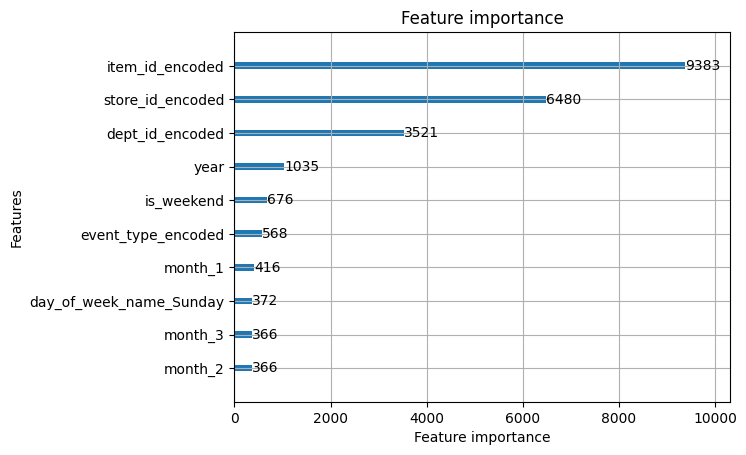

In [163]:
import matplotlib.pyplot as plt
lgb.plot_importance(loaded_model, max_num_features=10)
plt.show()